<h1>Navigation<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Цены-закрытия" data-toc-modified-id="Цены-закрытия-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цены закрытия</a></span></li><li><span><a href="#Доходности" data-toc-modified-id="Доходности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доходности</a></span></li></ul></li><li><span><a href="#SSA---L=30" data-toc-modified-id="SSA---L=30-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SSA - L=30</a></span><ul class="toc-item"><li><span><a href="#Цены-закрытия" data-toc-modified-id="Цены-закрытия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Цены закрытия</a></span><ul class="toc-item"><li><span><a href="#Разложение" data-toc-modified-id="Разложение-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Разложение</a></span></li><li><span><a href="#Разные-способы-группировки---сравнение" data-toc-modified-id="Разные-способы-группировки---сравнение-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Разные способы группировки - сравнение</a></span><ul class="toc-item"><li><span><a href="#Группировка-по-наибольшим-корреляциям" data-toc-modified-id="Группировка-по-наибольшим-корреляциям-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Группировка по наибольшим корреляциям</a></span></li><li><span><a href="#Группировка-по-кластерам.-Группировка-по-звеньям-(цепная-группировка)" data-toc-modified-id="Группировка-по-кластерам.-Группировка-по-звеньям-(цепная-группировка)-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>Группировка по кластерам. Группировка по звеньям (цепная группировка)</a></span></li><li><span><a href="#Сравнение-способов-группировок" data-toc-modified-id="Сравнение-способов-группировок-2.1.2.3"><span class="toc-item-num">2.1.2.3&nbsp;&nbsp;</span>Сравнение способов группировок</a></span></li><li><span><a href="#Общие-выводы-по-способам-группировки" data-toc-modified-id="Общие-выводы-по-способам-группировки-2.1.2.4"><span class="toc-item-num">2.1.2.4&nbsp;&nbsp;</span>Общие выводы по способам группировки</a></span></li></ul></li><li><span><a href="#Реконструкция.-Избавление-от-шума" data-toc-modified-id="Реконструкция.-Избавление-от-шума-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Реконструкция. Избавление от шума</a></span></li><li><span><a href="#ARIMA-и-предсказания" data-toc-modified-id="ARIMA-и-предсказания-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>ARIMA и предсказания</a></span></li></ul></li><li><span><a href="#Доходности" data-toc-modified-id="Доходности-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Доходности</a></span><ul class="toc-item"><li><span><a href="#Разложение" data-toc-modified-id="Разложение-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Разложение</a></span></li><li><span><a href="#Группировка-и-реконструкция" data-toc-modified-id="Группировка-и-реконструкция-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Группировка и реконструкция</a></span></li><li><span><a href="#ARIMA-и-предсказания" data-toc-modified-id="ARIMA-и-предсказания-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>ARIMA и предсказания</a></span></li></ul></li></ul></li><li><span><a href="#SSA---несколько-предсказаний" data-toc-modified-id="SSA---несколько-предсказаний-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SSA - несколько предсказаний</a></span></li></ul></div>

In [1]:
options(warn=0)

In [381]:
library(repr)  # Размеры графиков
library(Rssa)  # SSA
library(tidyverse)  # Для работы с данными
library(ggplot2)  # Для графиков
library(ggpubr)
library(reshape2)  # Для построения корреляционной матрциы
library(rlist)  # Для работы со списками
library(nortest)  # Основные классические критерии проверки на нормальность
library(aTSA)  # Тест Dickey-Fuller
library(forecast)  # Прогнозирование временных рядов
library(MLmetrics)  # метрики MSE, MAE, MAPE

In [3]:
# Функция, чтобы было удобно изменять размеры графиков 

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
theme_update(plot.title = element_text(hjust = 0.5))  # Чтобы по умолчанию название графика было в центре

# Обработка данных

In [112]:
head(data)

,Date,Time,Price,Returns
2021-04-20 00:01:00,2021-04-20 00:01:00,00:01,76.2330,NA
2021-04-20 00:03:00,2021-04-20 00:03:00,00:03,76.3791,0.0019164929
2021-04-20 00:05:00,2021-04-20 00:05:00,00:05,76.2710,-0.0014153086
2021-04-20 00:06:00,2021-04-20 00:06:00,00:06,76.4170,0.0019142269
2021-04-20 00:08:00,2021-04-20 00:08:00,00:08,76.3975,-0.0002551788
2021-04-20 00:11:00,2021-04-20 00:11:00,00:11,76.4100,0.0001636179


## Цены закрытия

In [98]:
data <- read.csv(file = 'Python/Курсовая/Data/USDRUB_210420.csv')
dim(data)

[1] 1436    9

In [104]:
data <- data %>% select(c('X.DATE.', 'X.TIME.', 'X.CLOSE.'))  # Оставляем только признаки с датой и ценой закрытия 
colnames(data) <- c("Date","Time","Price")  # Переименовываем признаки
data$Date <- paste(data$Date, '/', data$Time, sep='')  # Объединяем даты в один признак
data$Date <- strptime(data$Date, format='%d/%m/%y/%H:%M')  # Переводим даты в понятный R формат
rownames(data) <- data$Date  # Делаем признак дат индексом 

In [138]:
# Оставим 180 наблюдений (т. е. примерно три часа)
df <- head(data, 180)

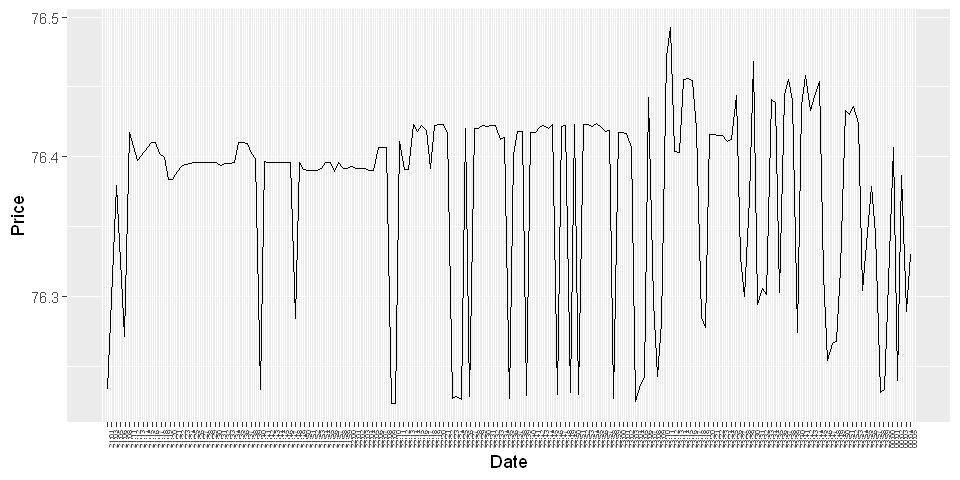

In [124]:
# Посмтроим график
df$Date <- as.numeric(df$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618866060, to = 1618877100, length.out = 180)
fig(8, 4)
ggplot(data=df, aes(x=Date, y=Price)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1,size=4))

In [107]:
# Итоговый датафрейм для SSA
df_price <- df %>% select(Price)
head(df)
head(df_price)

,Date,Time,Price
2021-04-20 00:01:00,1618866060,00:01,76.2330
2021-04-20 00:03:00,1618866180,00:03,76.3791
2021-04-20 00:05:00,1618866300,00:05,76.2710
2021-04-20 00:06:00,1618866360,00:06,76.4170
2021-04-20 00:08:00,1618866480,00:08,76.3975
2021-04-20 00:11:00,1618866660,00:11,76.4100


,Price
2021-04-20 00:01:00,76.2330
2021-04-20 00:03:00,76.3791
2021-04-20 00:05:00,76.2710
2021-04-20 00:06:00,76.4170
2021-04-20 00:08:00,76.3975
2021-04-20 00:11:00,76.4100


***

## Доходности

In [108]:
data$Returns[2:nrow(data)] <- ((data$Price[2:nrow(data)] - data$Price[1:(nrow(data)-1)])/data$Price[1:(nrow(data)-1)])  # Добавим признак доходности
head(data)
df_returns <- data[2:181,]

,Date,Time,Price,Returns
2021-04-20 00:01:00,2021-04-20 00:01:00,00:01,76.2330,NA
2021-04-20 00:03:00,2021-04-20 00:03:00,00:03,76.3791,0.0019164929
2021-04-20 00:05:00,2021-04-20 00:05:00,00:05,76.2710,-0.0014153086
2021-04-20 00:06:00,2021-04-20 00:06:00,00:06,76.4170,0.0019142269
2021-04-20 00:08:00,2021-04-20 00:08:00,00:08,76.3975,-0.0002551788
2021-04-20 00:11:00,2021-04-20 00:11:00,00:11,76.4100,0.0001636179


In [109]:
df_returns$Date <- as.numeric(df_returns$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df_returns$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")

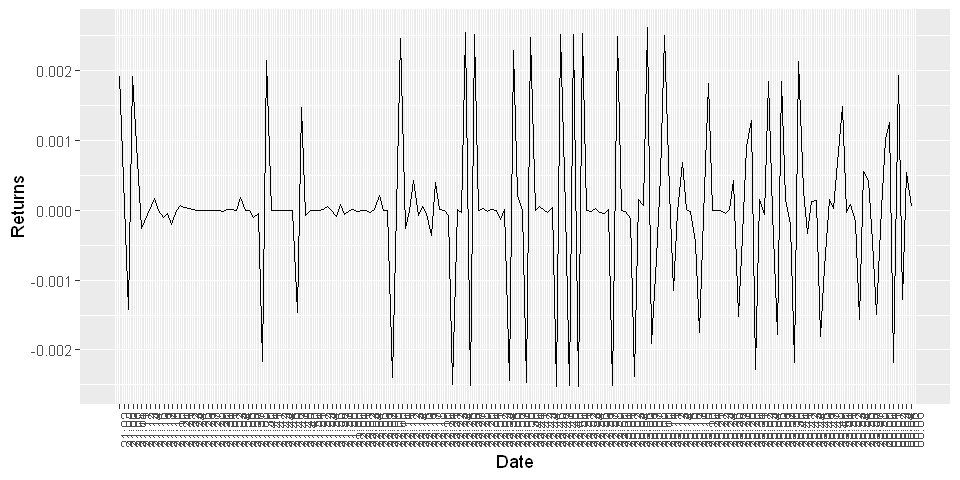

In [110]:
# Посмтроим график
df_returns$Date <- as.numeric(df_returns$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df_returns$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618866180, to = 1618877160, length.out = 180)
fig(8, 4)
ggplot(data=df_returns, aes(x=Date, y=Returns)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

In [111]:
# Итоговый датафрейм для SSA
df_returns <- df_returns %>% select(Returns)
head(df_returns)

,Returns
2021-04-20 00:03:00,0.0019164929
2021-04-20 00:05:00,-0.0014153086
2021-04-20 00:06:00,0.0019142269
2021-04-20 00:08:00,-0.0002551788
2021-04-20 00:11:00,0.0001636179
2021-04-20 00:12:00,0.0000000000


***

***

# SSA - L=30

## Цены закрытия

### Разложение

In [161]:
ts_df_price <- as.ts(df_price)

In [162]:
# Стадия декомпозиции
L = 30  # Окно
s <- ssa(df_price, L = L)

In [163]:
s


Call:
ssa(x = df_price, L = L)

Series length: 180,	Window length: 30,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 30,	Eigenvectors: 30,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.02718 MiB

In [164]:
df_all_norms = as.data.frame(s$sigma)
colnames(df_all_norms) = c('values')

df_wo_first = as.data.frame((s$sigma)[2:30])
colnames(df_wo_first) = c('values')

df_log = as.data.frame(log(s$sigma))
colnames(df_log) = c('values')

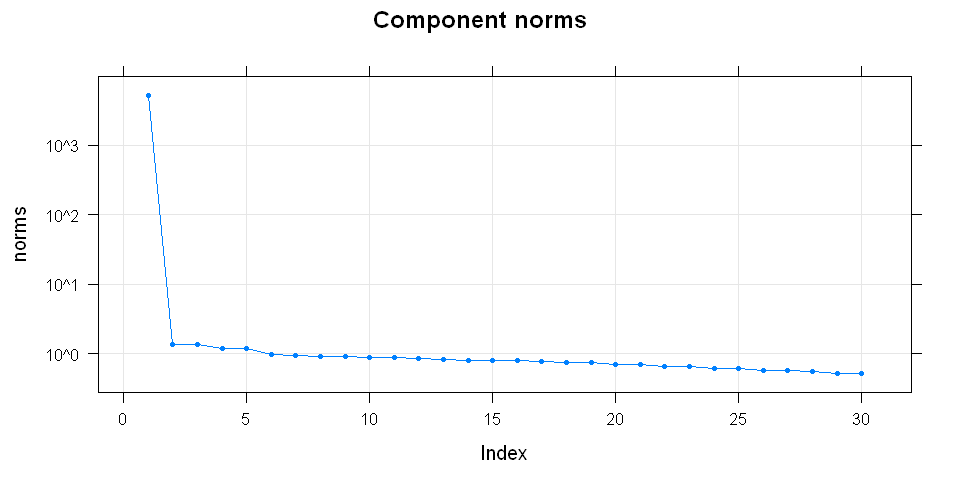

In [165]:
fig(8, 4)
plot(s) # Собственные числа

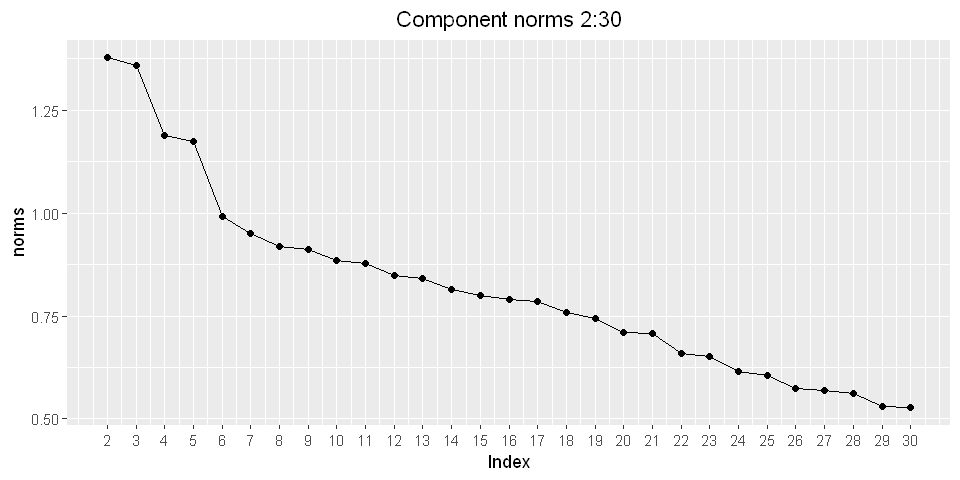

In [166]:
ggplot(data=df_wo_first, aes(x=2:(length(values)+1), y=values)) + 
    geom_line() +
    scale_x_continuous(breaks = 2:(length(df_wo_first$values)+1), labels=2:(length(df_wo_first$values)+1)) +
    geom_point() +
    ggtitle("Component norms 2:30") + xlab("Index") + ylab("norms")

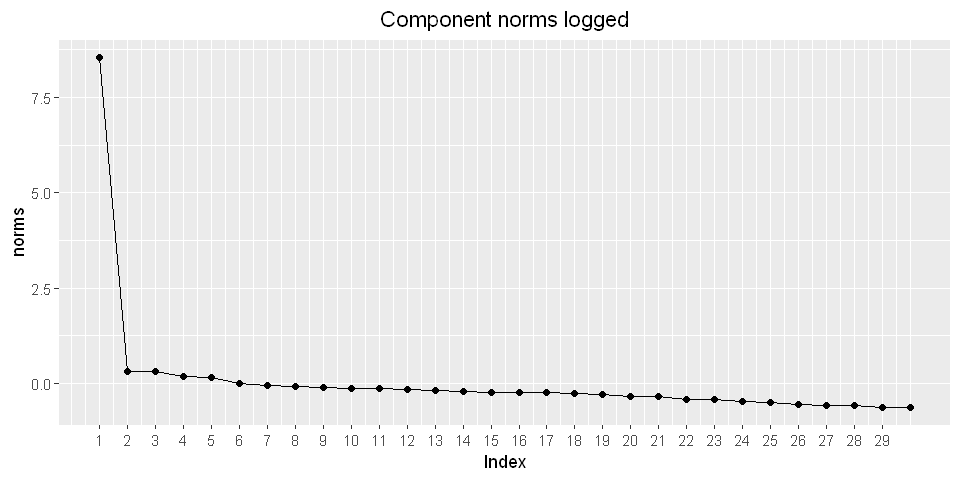

In [167]:
ggplot(data=df_log, aes(x=1:(length(values)), y=values)) + 
    geom_line() +
    scale_x_continuous(breaks = 1:(length(df_wo_first$values)), labels=1:(length(df_wo_first$values))) +
    geom_point() +
    ggtitle("Component norms logged") + xlab("Index") + ylab("norms")

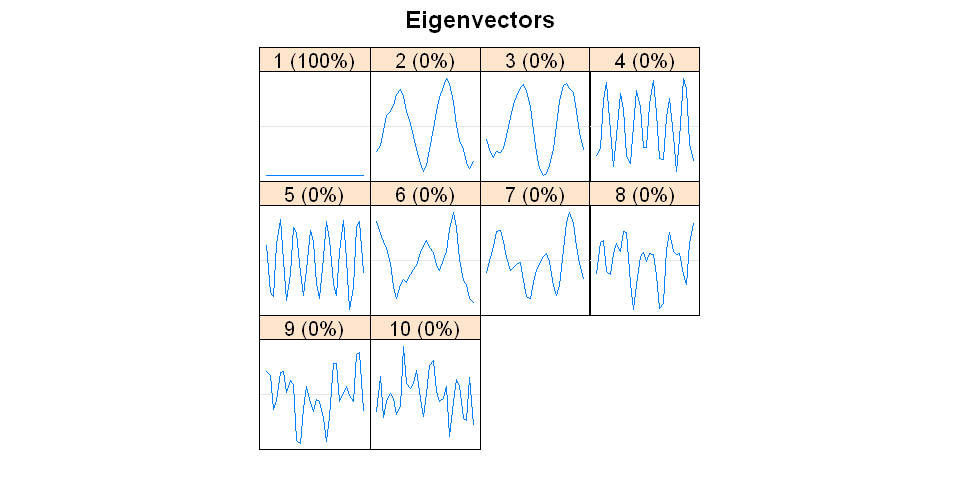

In [168]:
plot(s, type = "vectors") # Собственные векторы

### Разные способы группировки - сравнение

__Мы будем проводить группировку через взвешенные корреляции между собственными векторами.__

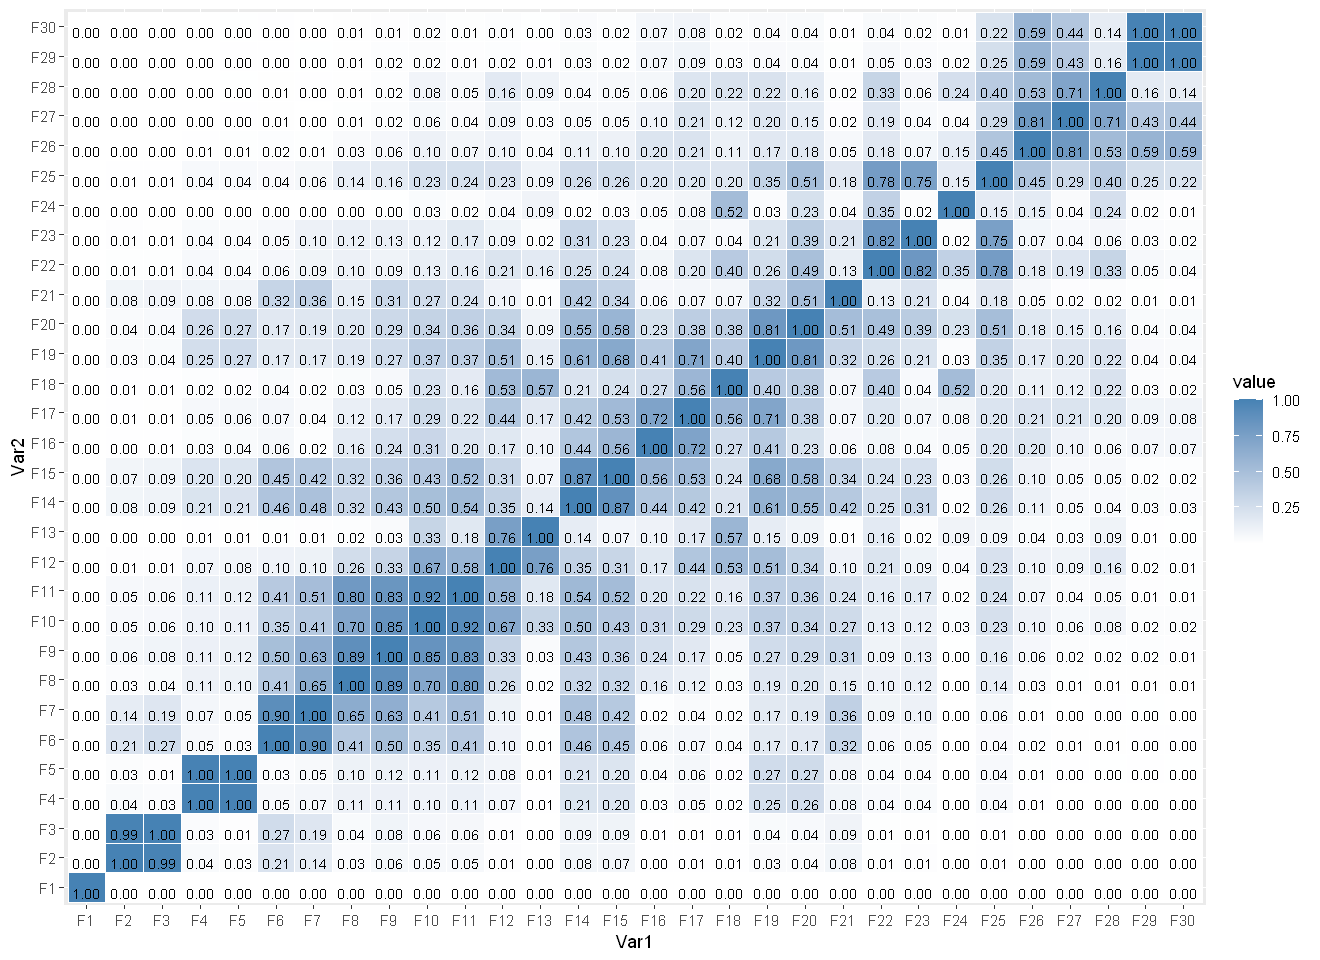

In [169]:
# Интереснее посмотреть на цветную версию матрицы корреляций

corr <- melt(wcor(s)[-31, ])  # Корреляции в более удобном формате для сравнений

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

In [170]:
head(corr)
corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
head(corr)

Var1,Var2,value
F1,F1,1.000000e+00
F2,F1,4.008617e-06
F3,F1,4.328920e-06
F4,F1,8.354900e-07
F5,F1,8.630562e-07
F6,F1,7.048718e-06


Var1,Var2,value
1,1,1.000000e+00
2,1,4.008617e-06
3,1,4.328920e-06
4,1,8.354900e-07
5,1,8.630562e-07
6,1,7.048718e-06


#### Группировка по наибольшим корреляциям

__Находим наибольшую корреляцию в матрице корреляций, группируем соответсвующие вектора и заново считаем матрицу корреляций; продолжаем группировку до тех пор, пока наибольшая корреляция не будет меньше установленного порога (по умолчанию 0.6).__

Сделаем несколько итераций вручную.

**Шаг 1**

In [171]:
# Установим порог наименьшей допустимой корреляции
threshold = 0.6

In [172]:
# Изначально наши группы векторов, с корреляцией которых мы и работаем
# представлены в виде списка последовательных чисел от 1 до общего числа векторов

groups <- list()
for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
    groups = append(groups, i)
    }

In [173]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Равенство не работает из-за погрешности вычитания
max_corr

max_corr$value[1]

Var1,Var2,value
5,4,0.9978394
4,5,0.9978394


[1] 0.9978394

In [174]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

In [175]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

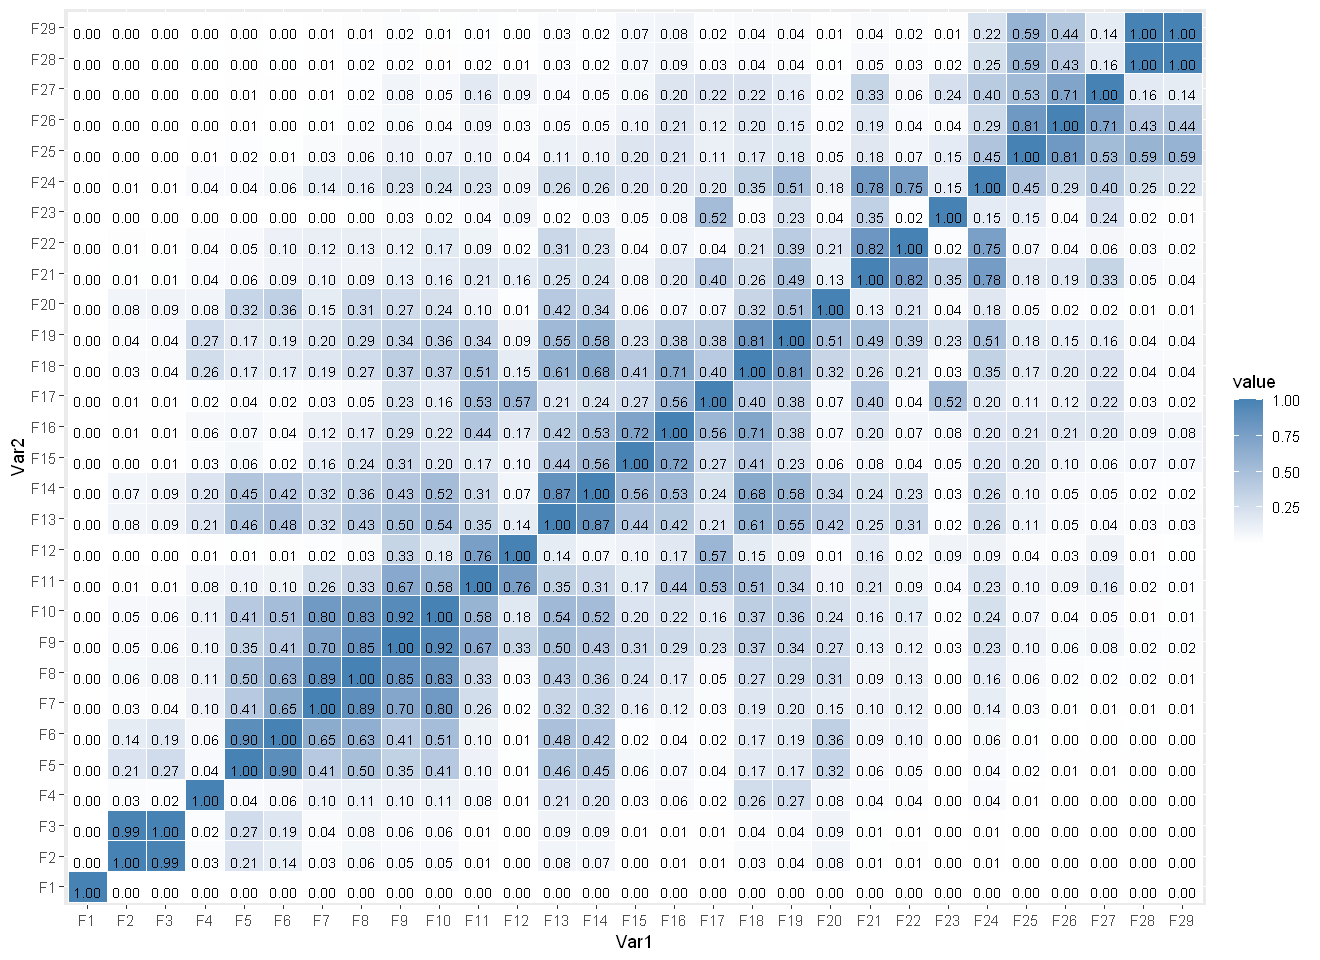

In [176]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 2**

In [177]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6) 
max_corr

max_corr$value[1]

Var1,Var2,value
29,28,0.9966532
28,29,0.9966532


[1] 0.9966532

In [178]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

Несмотря на то, что в датафрейме это вектора F28 и F29 необходимо учитывать, что мы уже выкинули один вектор и пересчитали матрицу без него, а потому это все-таки 29 и 30 вектор.

In [179]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

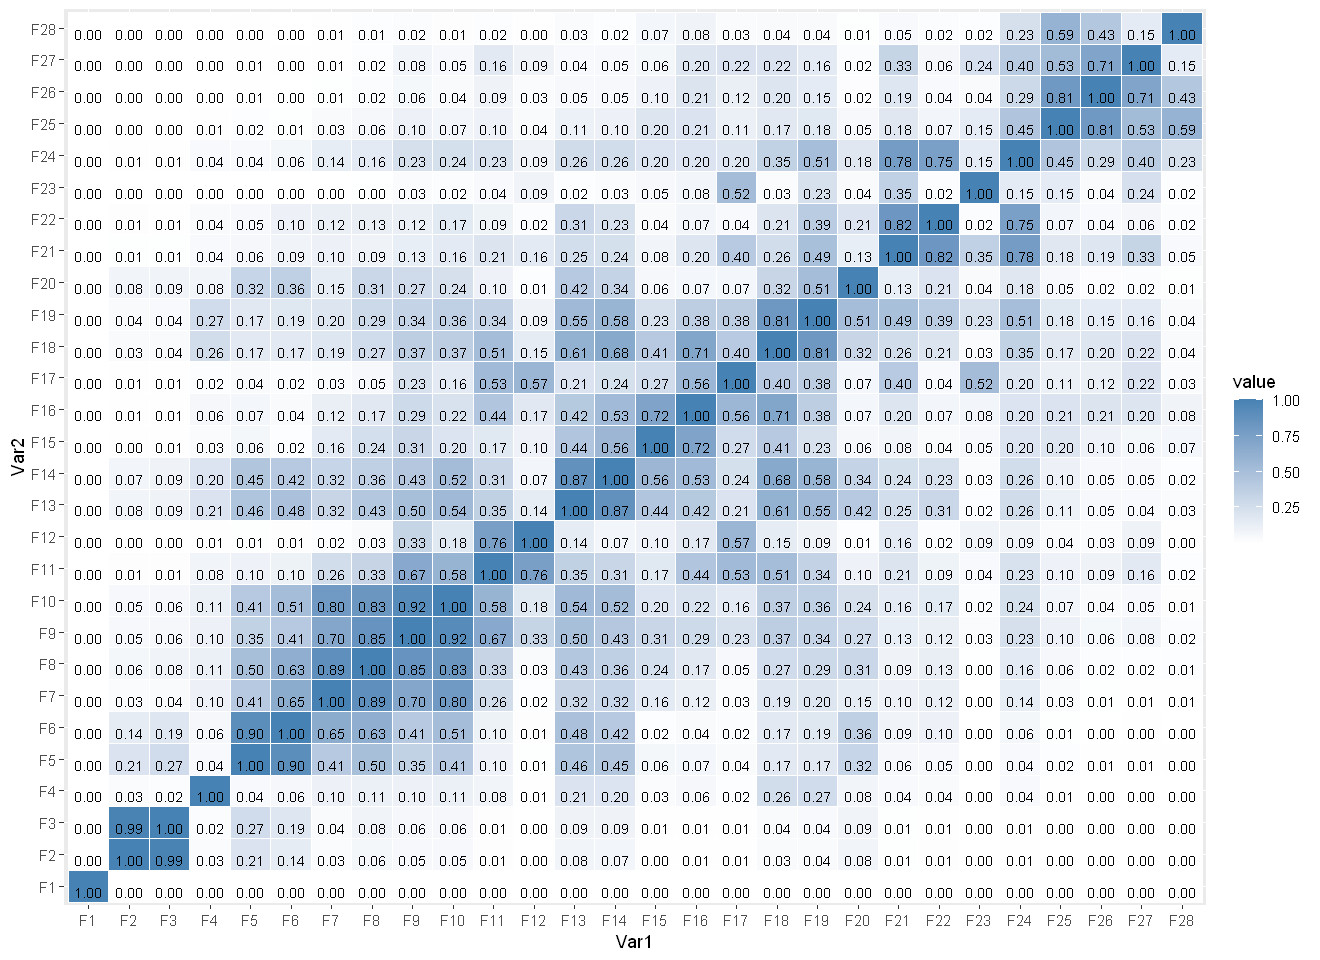

In [180]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 3**

In [181]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6) 
max_corr

max_corr$value[1]

Var1,Var2,value
3,2,0.9932955
2,3,0.9932955


[1] 0.9932955

In [182]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

In [183]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

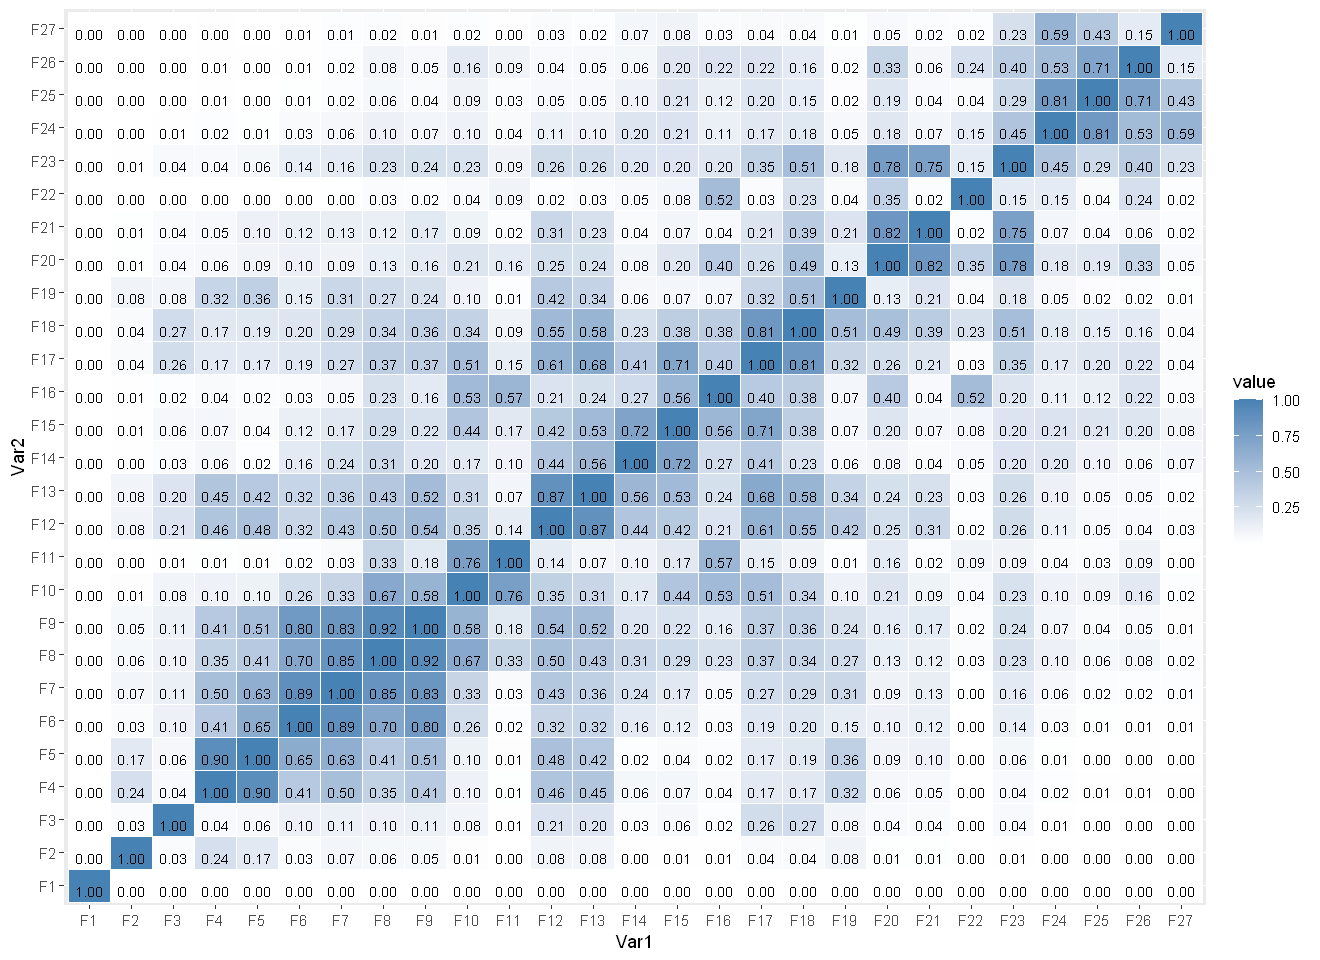

In [184]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Автоматизируем процесс и посмотрим на нашу матрицу корреляций через 5 итераций.**

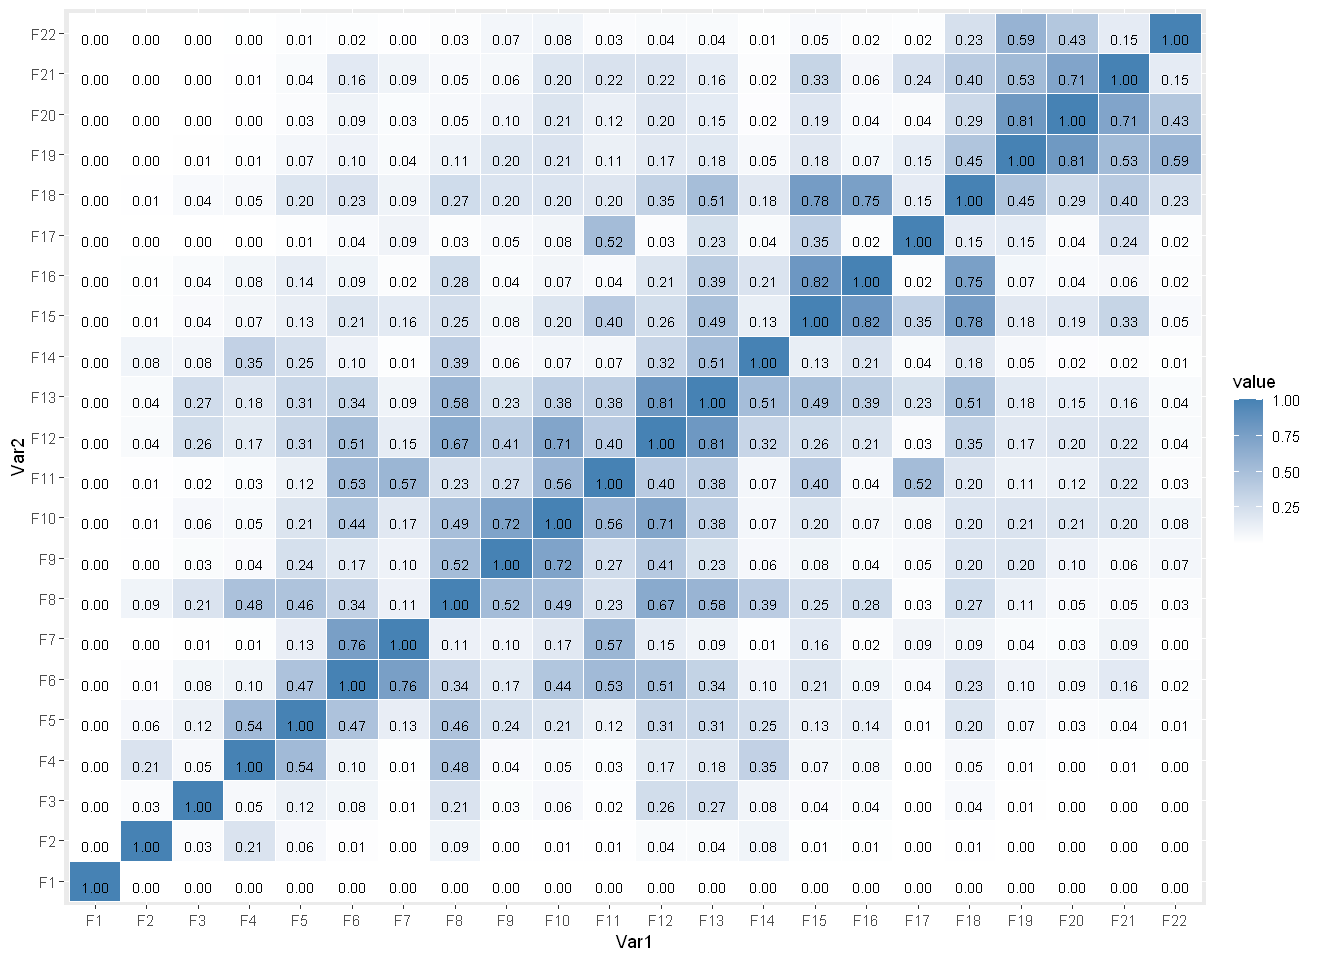

In [185]:
for (i in 1:5) {
    max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Находим наибольшее значение корреляции
    if (max_corr$value[1] >= threshold) {  # Проверяем что наша корреляция не меньше установленного порога
        to_combine <- sort(c(max_corr$Var1[1:2]))  # Объединяем вектора с наибольшей корреляцией в списке
        groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
        groups[[to_combine[2]]] <- NULL
        corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])  # Пересчитываем матрицу корреляций
    }
}

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

In [186]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19

[[13]]
[1] 20

[[14]]
[1] 21

[[15]]
[1] 22

[[16]]
[1] 23

[[17]]
[1] 24

[[18]]
[1] 25

[[19]]
[1] 26

[[20]]
[1] 27

[[21]]
[1] 28

[[22]]
[1] 29 30

**Продолжаем до тех пор, пока максимальная корреляция между векторами выше установленного порога.**

Напишем функцию которая проводит эту операцию в автоматическом режиме. На вход она будет принимать порог threshold и изначальную матрицу корреляций. 

In [187]:
group_by_max_corr <- function(corr, threshold=0.6) {
    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
    
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Находим наибольшее значение корреляции
    while (max_corr$value[1] >= threshold) {
        to_combine <- sort(c(max_corr$Var1[1:2]))  # Объединяем вектора с наибольшей корреляцией в списке
        groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
        groups[[to_combine[2]]] <- NULL
        corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])  # Пересчитываем матрицу корреляций
        corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
        corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)
    }
    return (groups)
}

In [188]:
corr <- melt(wcor(s)[-31, ])

In [189]:
group_by_max_corr(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

#### Группировка по кластерам. Группировка по звеньям (цепная группировка)

__Начиная с первого вектора, смотрим его попарные корреляции с n соседними векторами, если корреляция хотя бы с одним соседом больше заданного порога threshold, то группируем этот вектор **с ближайшим соседом** и затем, когда кластер уже образован и следующий сосед уже не скоррелирован с предыдущими, пересчитываем матрицу корреляции; повторяем до тех пор, пока нельзя будет образовать ни один кластер.__

__Группировка по звеньям очень похожа на группировку по кластерам с тем отличием, что тут число соседей всегда равно 1 и при этом матрица корреляции пересчитывается каждый раз, когда два каких-либо векторов удается сгруппировать.__

Так же как и в предыдущем случае сначала посмотрим на группировку по шагам.

In [42]:
corr <- melt(wcor(s)[-31, ])

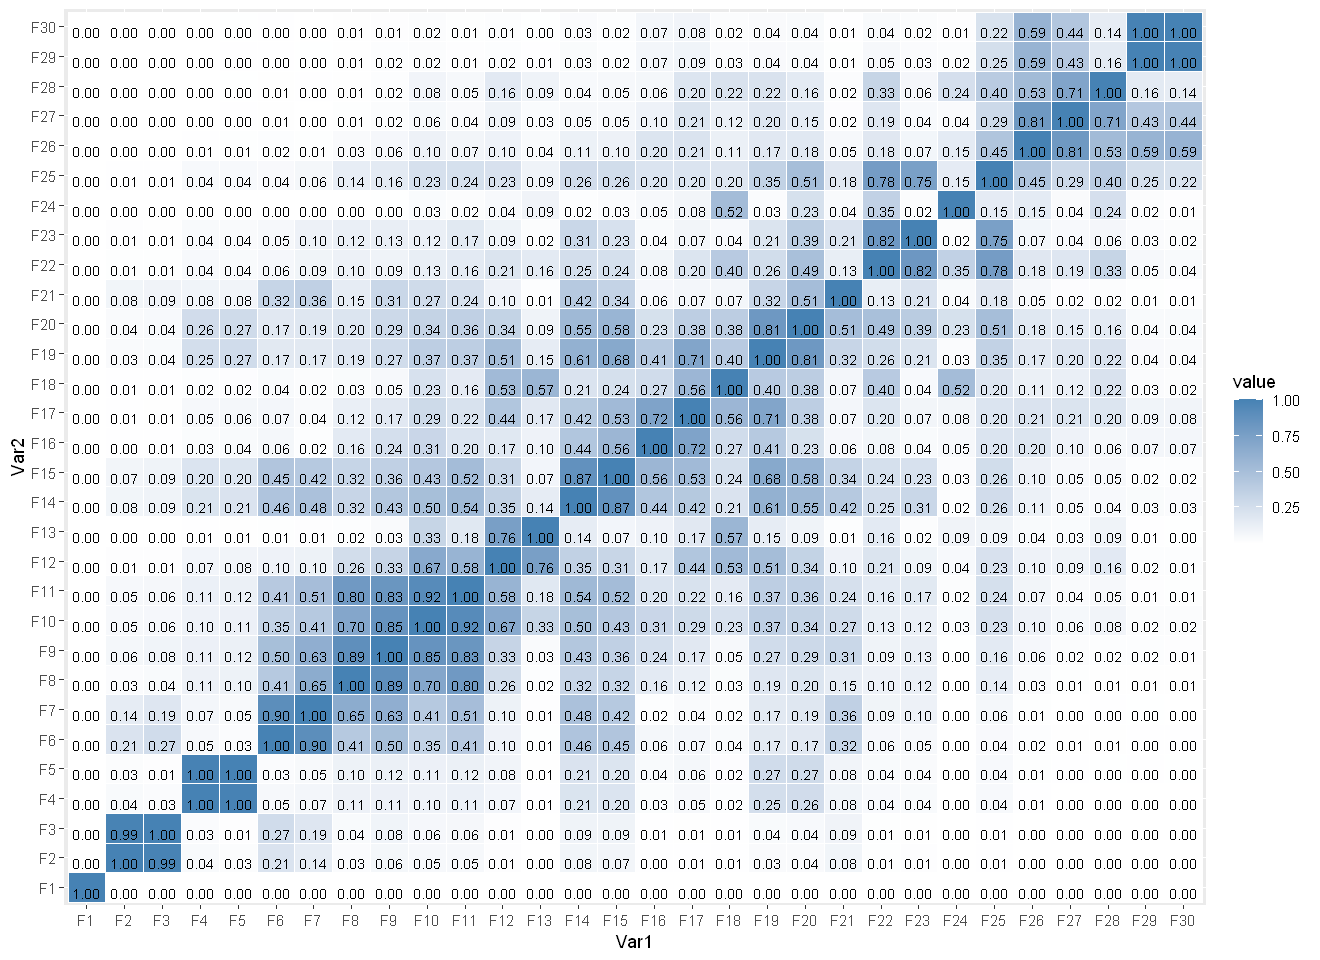

In [43]:
fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 1**

In [44]:
# Установим порог наименьшей допустимой корреляции
threshold = 0.6

In [45]:
# Изначально наши группы векторов, с корреляцией которых мы и работаем
# представлены в виде списка последовательных чисел от 1 до общего числа векторов

groups <- list()
for (i in 1:1:(nrow(corr %>% filter(Var2 == 1)))) {
    groups = append(groups, i)
    }

In [46]:
# Работаем с первым вектором
k = 1
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по первому вектору
corr_vector

Var1,Var2,value
1,1,1.000000e+00
2,1,4.008617e-06
3,1,4.328920e-06
4,1,8.354900e-07
5,1,8.630562e-07
6,1,7.048718e-06
7,1,7.128745e-06
8,1,1.984430e-06
9,1,5.761689e-06
10,1,5.427152e-06


In [47]:
# Объединяем соседей с большой корреляцией (зададим число соседей равное 3)
to_combine = c(groups[[1]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [48]:
to_combine
length(to_combine)

# Так как первый вектор группировать ни с каким другим не надо, то наши группы векторов и матрица корреляций не изименятся 
# и ничего пересчитывать не надо, просто переходим к следующему шагу

[1] 1

[1] 1

**Шаг 2**

In [49]:
# Работаем со вторым вектором
k = 2
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по второму вектору

In [50]:
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[2]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [51]:
# Введем проверку длину группы to_combine, и если она будет больше 2, то будем пересчитывать группы и матрицу корреляций
if (length(to_combine) > len_start) {
    groups[[to_combine[1]]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}

In [52]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4

[[4]]
[1] 5

[[5]]
[1] 6

[[6]]
[1] 7

[[7]]
[1] 8

[[8]]
[1] 9

[[9]]
[1] 10

[[10]]
[1] 11

[[11]]
[1] 12

[[12]]
[1] 13

[[13]]
[1] 14

[[14]]
[1] 15

[[15]]
[1] 16

[[16]]
[1] 17

[[17]]
[1] 18

[[18]]
[1] 19

[[19]]
[1] 20

[[20]]
[1] 21

[[21]]
[1] 22

[[22]]
[1] 23

[[23]]
[1] 24

[[24]]
[1] 25

[[25]]
[1] 26

[[26]]
[1] 27

[[27]]
[1] 28

[[28]]
[1] 29

[[29]]
[1] 30

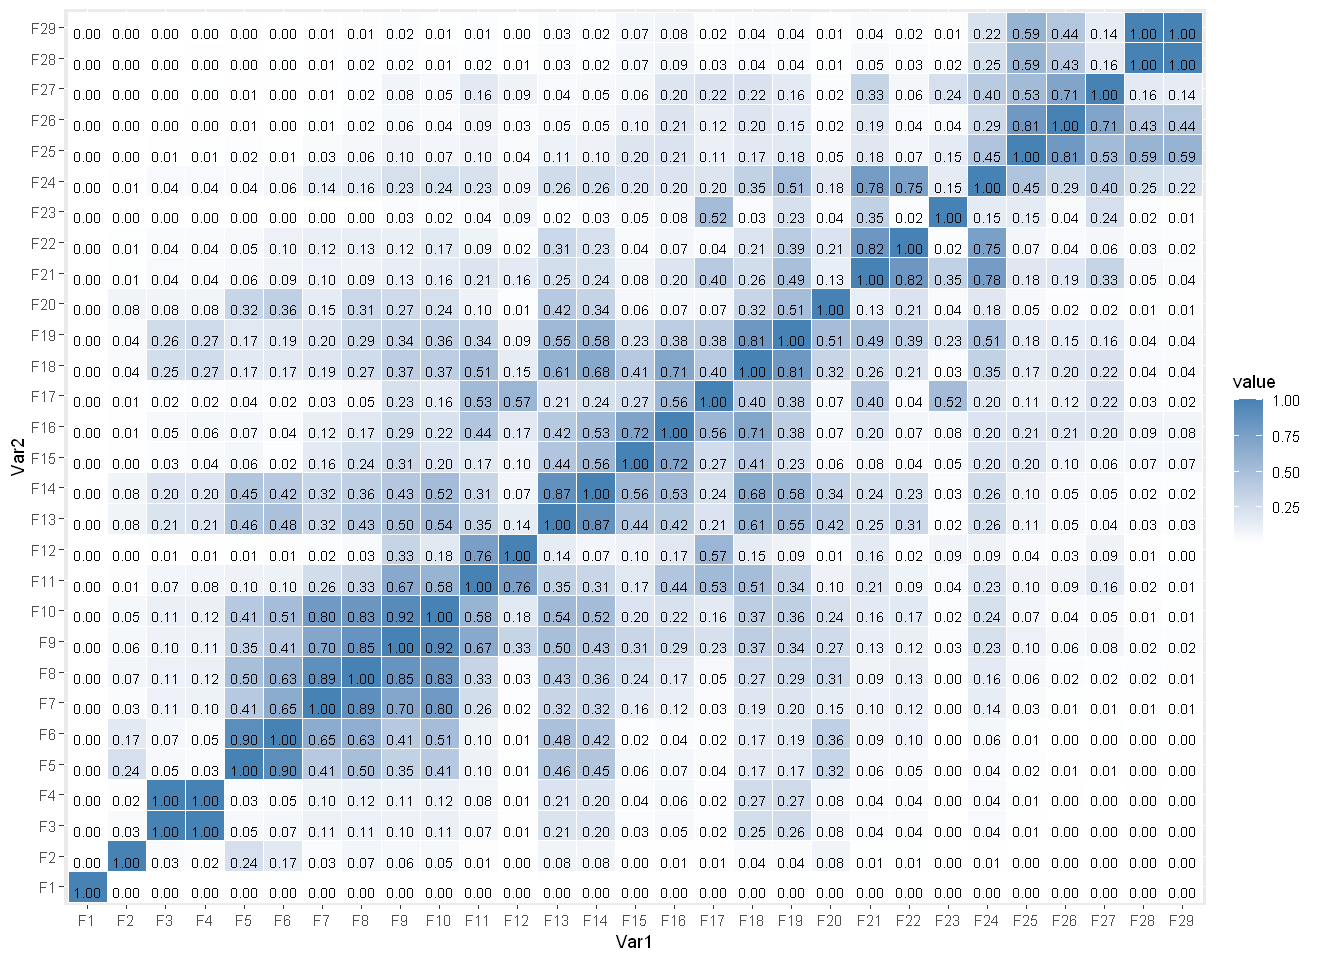

In [53]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 3**

In [54]:
# Работаем снова со вторым объединенным вектором, так как мы пересчитывали матрицу корреляций
k = 2
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по второму вектору

In [55]:
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[k]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [56]:
if (length(to_combine) > len_start) {
    groups[[to_combine[1]]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}

In [57]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4

[[4]]
[1] 5

[[5]]
[1] 6

[[6]]
[1] 7

[[7]]
[1] 8

[[8]]
[1] 9

[[9]]
[1] 10

[[10]]
[1] 11

[[11]]
[1] 12

[[12]]
[1] 13

[[13]]
[1] 14

[[14]]
[1] 15

[[15]]
[1] 16

[[16]]
[1] 17

[[17]]
[1] 18

[[18]]
[1] 19

[[19]]
[1] 20

[[20]]
[1] 21

[[21]]
[1] 22

[[22]]
[1] 23

[[23]]
[1] 24

[[24]]
[1] 25

[[25]]
[1] 26

[[26]]
[1] 27

[[27]]
[1] 28

[[28]]
[1] 29

[[29]]
[1] 30

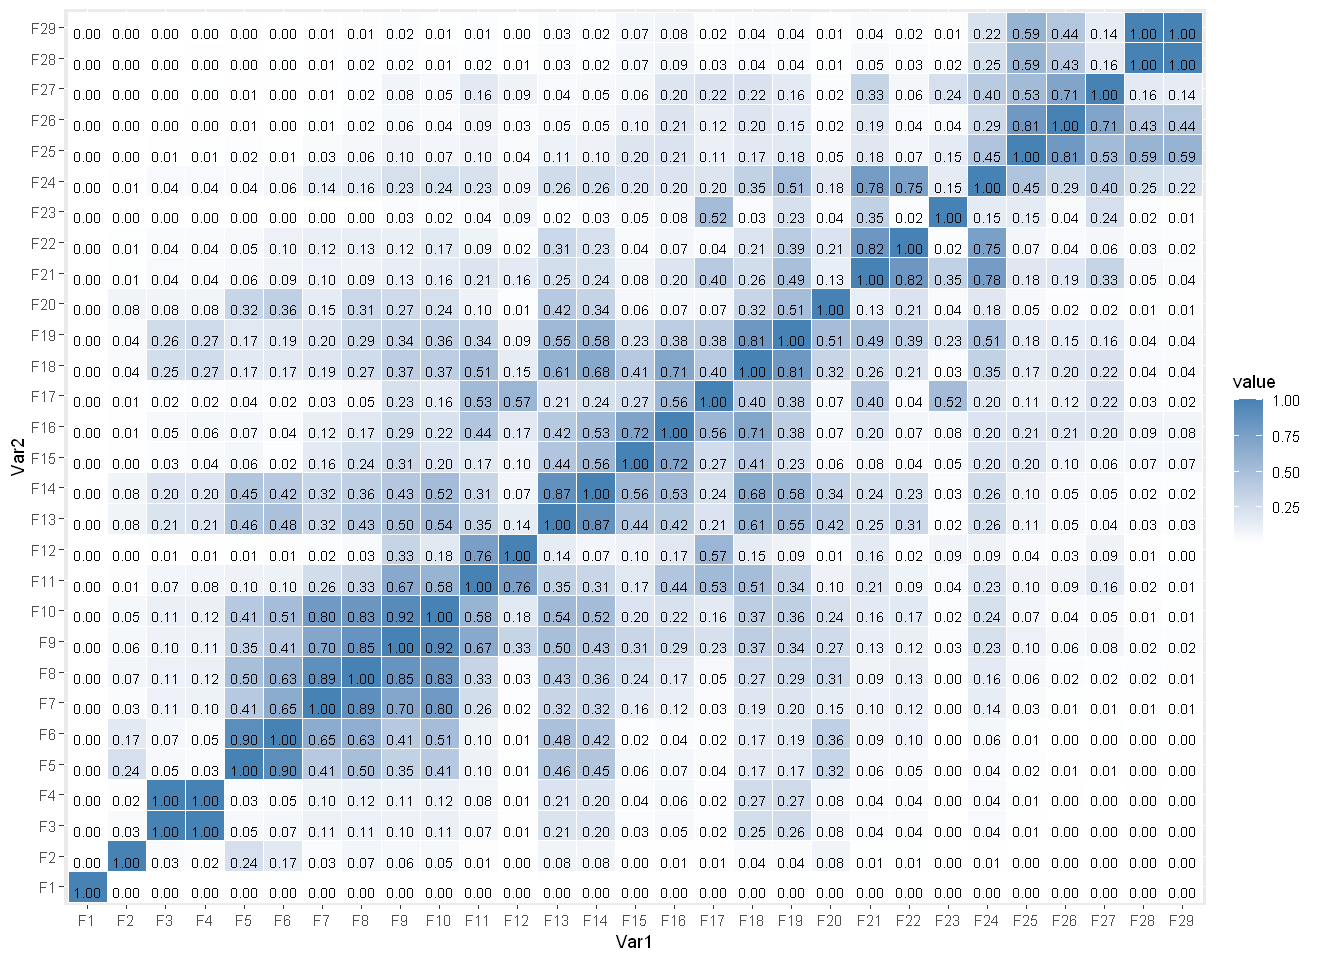

In [58]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 4**

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6

[[5]]
[1] 7

[[6]]
[1] 8

[[7]]
[1] 9

[[8]]
[1] 10

[[9]]
[1] 11

[[10]]
[1] 12

[[11]]
[1] 13

[[12]]
[1] 14

[[13]]
[1] 15

[[14]]
[1] 16

[[15]]
[1] 17

[[16]]
[1] 18

[[17]]
[1] 19

[[18]]
[1] 20

[[19]]
[1] 21

[[20]]
[1] 22

[[21]]
[1] 23

[[22]]
[1] 24

[[23]]
[1] 25

[[24]]
[1] 26

[[25]]
[1] 27

[[26]]
[1] 28

[[27]]
[1] 29

[[28]]
[1] 30

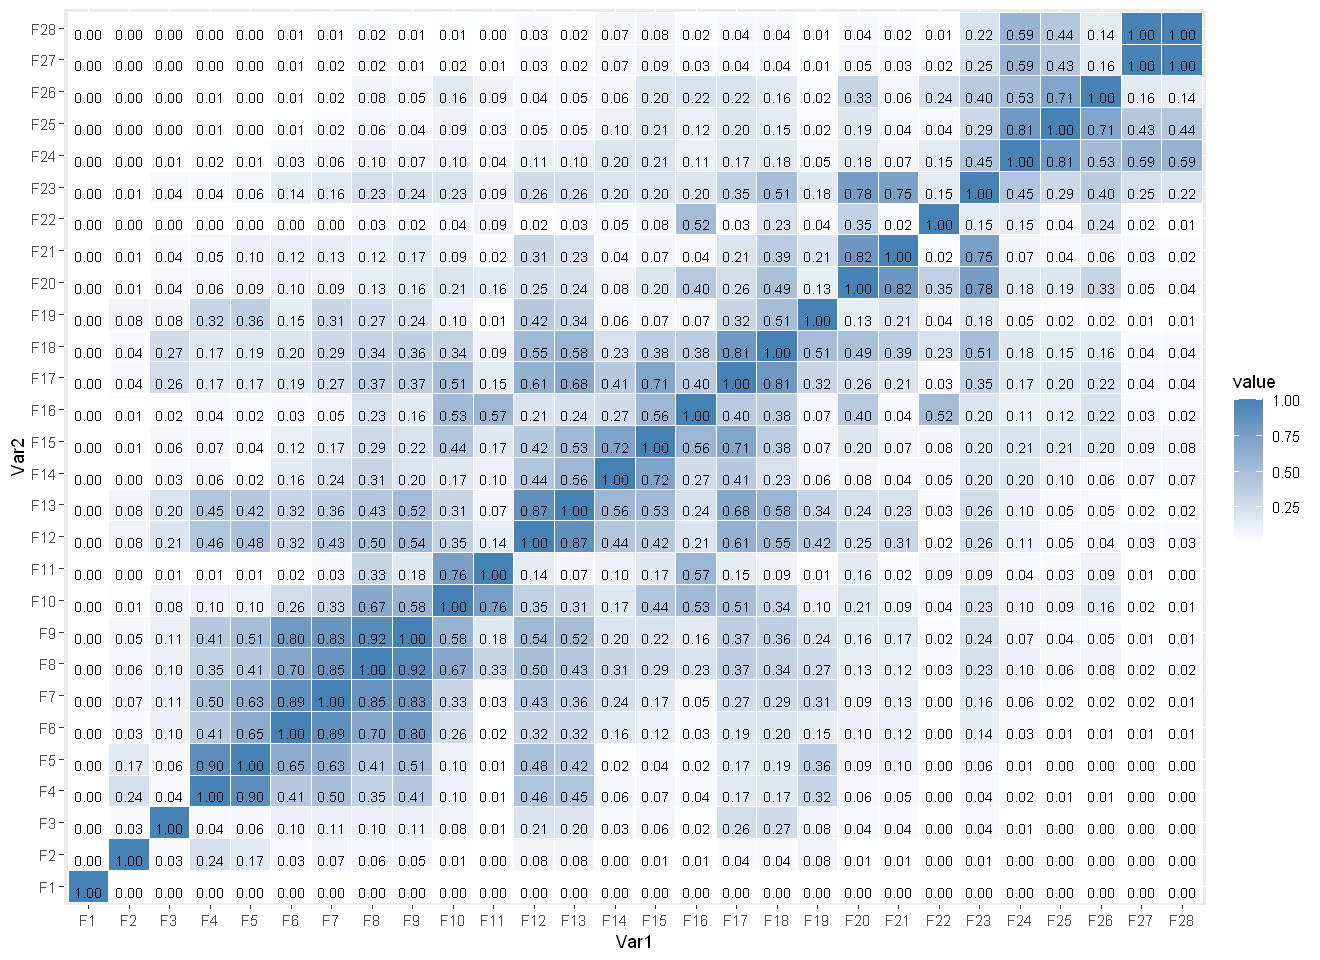

In [59]:
# Работаем снова с третьим объединенным вектором
k = 3
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по третьему вектору
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[k]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}
if (length(to_combine) > len_start) {
    groups[[k]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}
groups
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Продолжаем до тех пор, пока все кластеры не будут определены и получены.**

Напишем функцию которая проводит эту операцию в автоматическом режиме. На вход она будет принимать количество соседей n, порог threshold и изначальную матрицу корреляций. 

In [60]:
corr_clusters <- function(corr, n=3, threshold=0.6) {
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    k = 1  # Начинаем с первого вектора
    
    while (k < length(groups)) {
        corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций 
        to_combine = c(groups[[k]])  # Сначала добавляем первый вектор в группу для объединения 
        len_start = length(to_combine)
        j = k + 1

        # Возвращаем TRUE, если корреляция с одним из n соседей больше порога
        significant_corr <- FALSE
        for (i in j:(j+n-1)) {
            significant_corr = significant_corr | (corr_vector$value[i] >= threshold)
        }

        # Объединяем соседние векторы пока корреляция значительная
        while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
            to_combine = c(to_combine, groups[[j]])
            j = j + 1
            significant_corr <- FALSE
            for (i in j:(j+n-1)) {
                significant_corr = significant_corr | (corr_vector$value[i] >= threshold)
            }
        }

        # Если нам удалось сгруппировать векторы, мы пересчитываем матрицу корреляций и список групп
        # Если не удалось - то переходим к следующему вектору
        if (length(to_combine) > len_start) {
            groups[[k]] <- to_combine
            for (i in (k+length(to_combine)-len_start):(k+1)) {
               groups[[i]] <- NULL 
            }
            corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])
            corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
            corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        } else {
            k <- k + 1
        }       
    }
    return (groups)
}

In [61]:
corr <- melt(wcor(s)[-31, ])

In [62]:
corr_clusters(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

**И наконец функция для цепной группировки. Напоминаю, что отличия 2: число соседей в данном случае будем принимать всегда за 1, и, вдобавок к этому, будем пересчитывать матрицу корреляции каждый раз, когда нам удается сгруппировать пару векторов.**

In [63]:
corr_chain <- function(corr, threshold=0.6) {
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    k = 1  # Начинаем с первого вектора
    
    while (k < length(groups)) {
        corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций 
        to_combine = c(groups[[k]])  # Сначала добавляем первый вектор в группу для объединения 
        j = k + 1

        # Возвращаем TRUE, если корреляция с соседним вектором больше порога
        significant_corr = (corr_vector$value[j] >= threshold)

        # Объединяем соседние векторы и пересчитываем матрицу корреляций и список групп, если корреляция значительная
        if (significant_corr) {
            to_combine = c(to_combine, groups[[j]])
            groups[[k]] <- to_combine
            groups[[k+1]] <- NULL
            corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])
            corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
            corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        } else {
            k <- k + 1
        }
    }
    return (groups)
}

In [64]:
corr_chain(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

#### Сравнение способов группировок

**Итого нами были написаны три функции. Сравним наши способы группировки на разных данных (цены закрытия в текущем периоде и два другим временных периода длиной 180 минут) при разных значениях порога и числа соседей в случае кластерной группировки.**

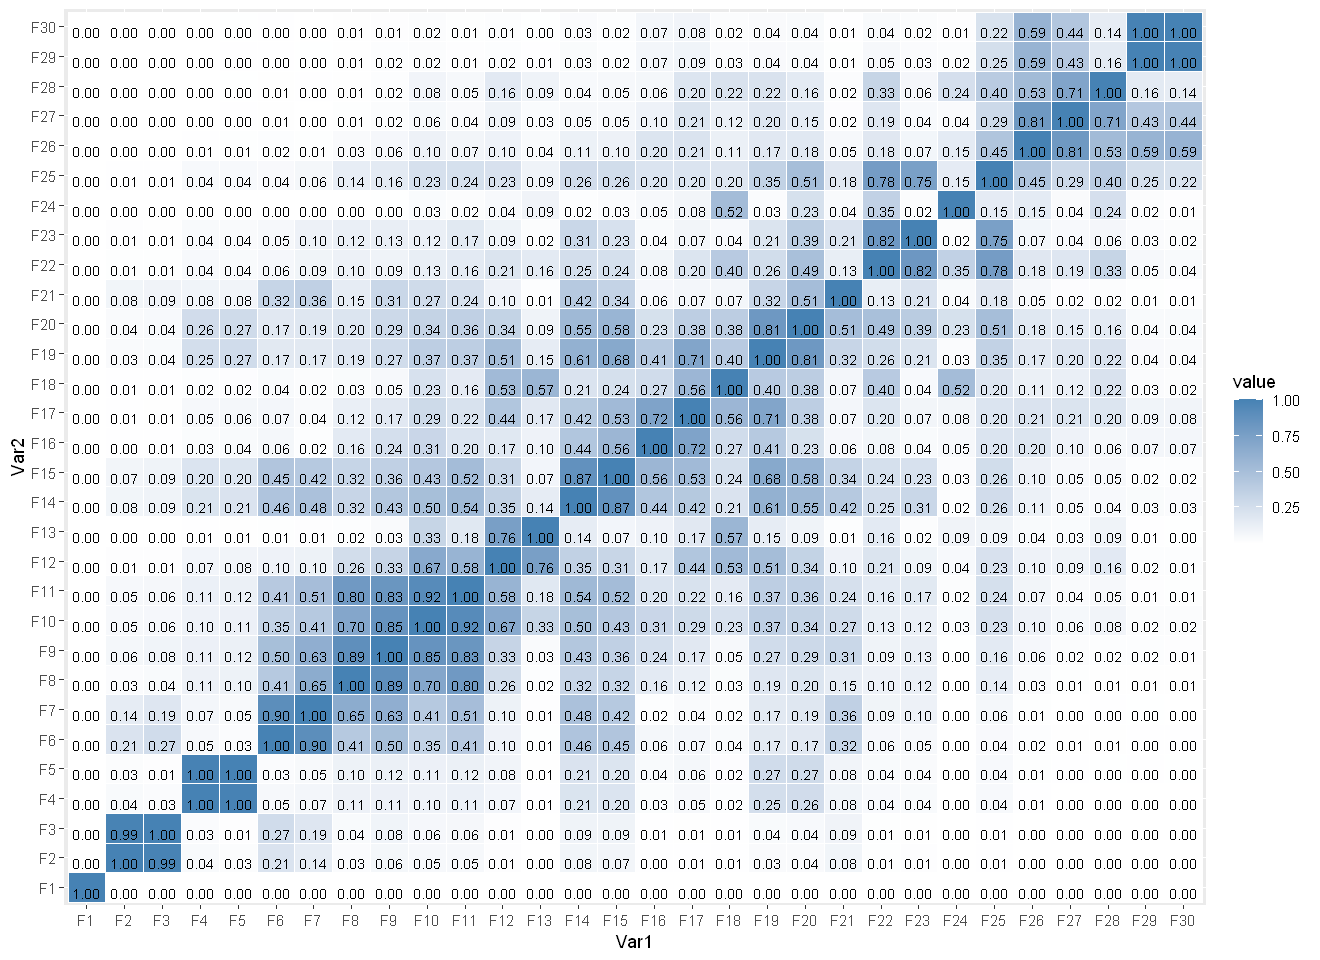

In [65]:
# Исходная матрица корреляции

corr <- melt(wcor(s)[-31, ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

In [66]:
# Группировка по наибольшм корреляциям (threshold = 0.6)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

In [67]:
# Группировка по наибольшм корреляциям (threshold = 0.7)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 25

[[13]]
[1] 24

[[14]]
[1] 26 27

[[15]]
[1] 28

[[16]]
[1] 29 30

In [68]:
# Группировка по наибольшм корреляциям (threshold = 0.8)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29 30

In [69]:
# Группировка по наибольшм корреляциям (threshold = 0.9)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29 30

In [70]:
# Цепная группировка (threshold=0.6)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

In [71]:
# Цепная группировка (threshold=0.7)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27

[[16]]
[1] 28

[[17]]
[1] 29 30

In [72]:
# Цепная группировка (threshold=0.8)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8 9

[[6]]
[1] 10 11

[[7]]
[1] 12

[[8]]
[1] 13

[[9]]
[1] 14 15

[[10]]
[1] 16

[[11]]
[1] 17

[[12]]
[1] 18

[[13]]
[1] 19 20

[[14]]
[1] 21

[[15]]
[1] 22 23

[[16]]
[1] 24

[[17]]
[1] 25

[[18]]
[1] 26 27

[[19]]
[1] 28

[[20]]
[1] 29 30

In [73]:
# Цепная группировка (threshold=0.9)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29 30

__Для кластерной группировки рассмотрим n = 2, 3 и threshold = 0.6, 0.7, 0.8, 0.9__

In [74]:
# Кластерная группировка (n=3, threshold=0.6)

corr_clusters(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

In [75]:
# Кластерная группировка (n=3, threshold=0.7)

corr_clusters(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27

[[14]]
[1] 28

[[15]]
[1] 29

[[16]]
[1] 30

In [76]:
# Кластерная группировка (n=3, threshold=0.8)

corr_clusters(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29

[[20]]
[1] 30

In [77]:
# Кластерная группировка (n=3, threshold=0.9)

corr_clusters(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29

[[26]]
[1] 30

In [78]:
# Кластерная группировка (n=2, threshold=0.6)

corr_clusters(corr, n=2)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

In [79]:
# Кластерная группировка (n=2, threshold=0.7)

corr_clusters(corr, n=2, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27

[[14]]
[1] 28

[[15]]
[1] 29

[[16]]
[1] 30

In [80]:
# Кластерная группировка (n=2, threshold=0.8)

corr_clusters(corr, n=2, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29

[[20]]
[1] 30

In [81]:
# Кластерная группировка (n=2, threshold=0.9)

corr_clusters(corr, n=2, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29

[[26]]
[1] 30

**Выводы по текущему датасету:**

- Группировка по наибольшей корреляции хорошо улавливает достаточно сильную взаимосвязь между 22, 23 и 25 компонентами, а так же между 14, 15, 19, 20 компонентами (что не улавливают другие способы группировки, хотя по матрице корреляций заметно, что их сгруппировать все-таки стоит)
- Мне кажется, что оптимальным порогом для всех способов группировки является уровень 0.6-0.7, так как при уровнях 0.8-0.9 мы начинаем терять связи между компонентами, которые могут быть значимыми
- Цепная группировка дает практически те же результаты, что и кластерная

В дальнейшем я бы использовала группировку по большей корреляции, так как она улавливает не самые очевидные взаимосвязи между векторами.

**Проблема:** в кластерной группировке не объединяются последние вектора. Нужно их объединять как-то по-другому, так как мы в цикле должны проверить n соседей, что, очевидно, невозможно, для последних векторов. В питоне это можно было обойти через конструкцию try-except.

__Рассмотрим теперь методы группировки на другом отрезке времени по 180 минут__

Сначала я хотела рассмотреть 2-3 других отрезка, но уже после первого поняла, что уже можно сделать выводы и что дальнейшие попытки будут их лишь подтверждать.

In [82]:
df_2 <- data[190:369, ]
df_3 <- data[380:559, ]

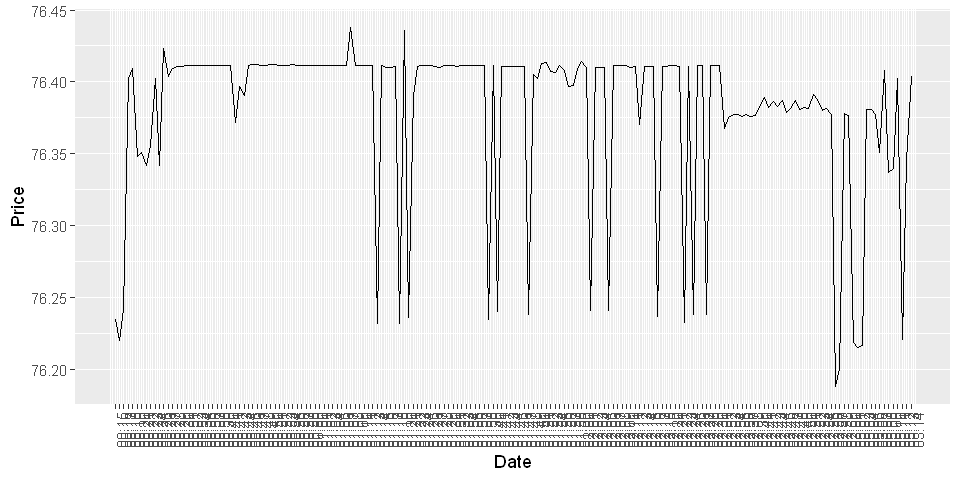

In [83]:
# Построим график df_2
df_2$Date <- as.numeric(df_2$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df_2$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618877700, to = 1618888440, length.out = 180)
fig(8, 4)
ggplot(data=df_2, aes(x=Date, y=Price)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

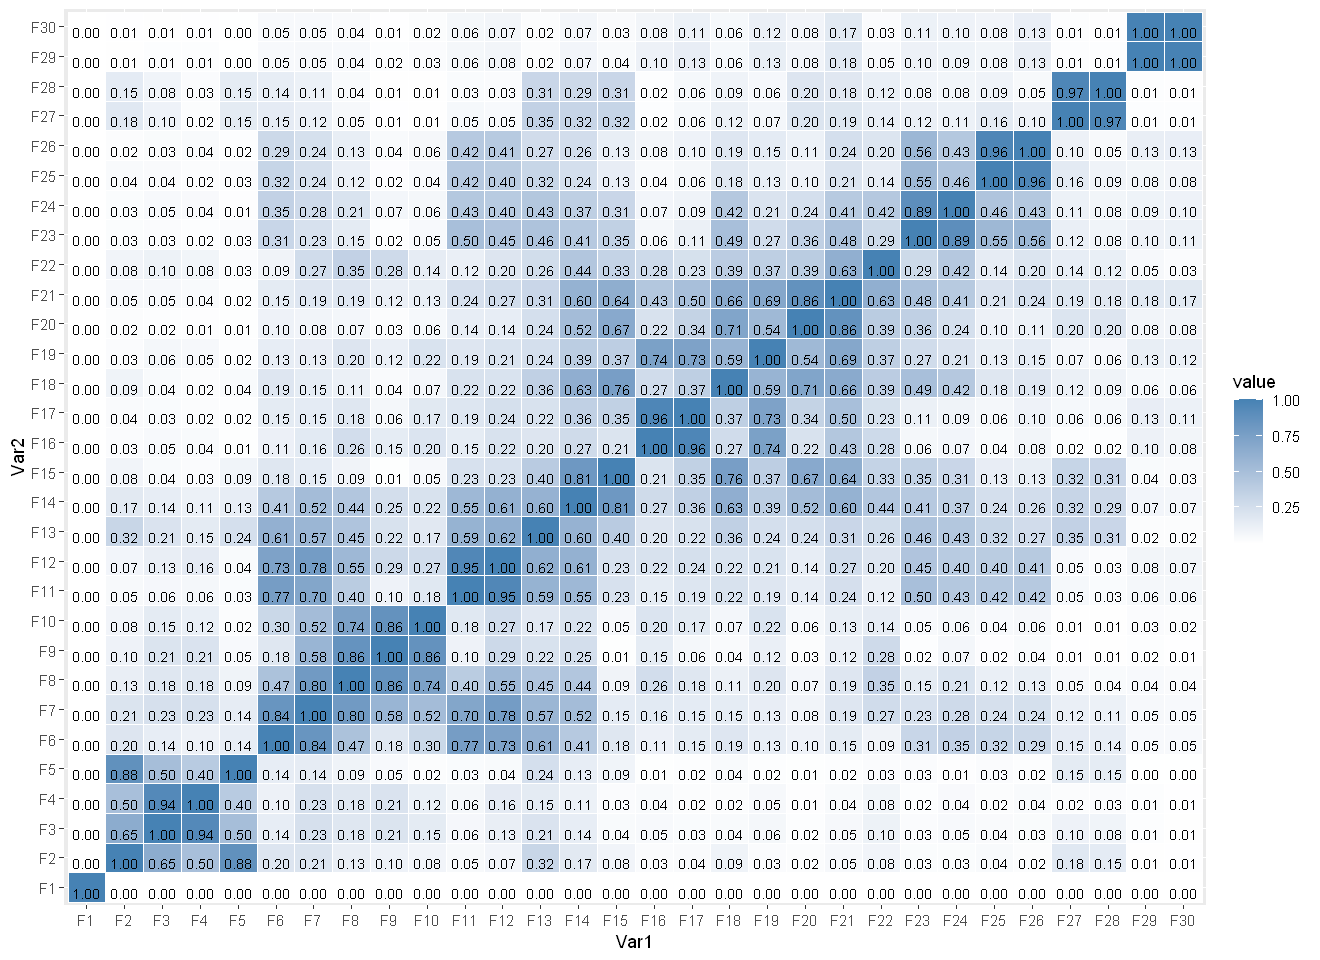

In [84]:
df_price_2 <- df_2 %>% select(Price)
ts_df_price_2 <- as.ts(df_price_2)
# Стадия декомпозиции
L = 30  # Окно
s_2 <- ssa(df_price_2, L = L)
corr_2 <- melt(wcor(s_2)[-31, ])  # Корреляции в более удобном формате для сравнений


fig(11, 8)
ggplot(data = corr_2, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

In [85]:
# Группировка по наибольшм корреляциям (threshold = 0.6)
group_by_max_corr(corr_2)

# Группировка по наибольшм корреляциям (threshold = 0.7)
group_by_max_corr(corr_2, threshold=0.7)

# Опять же, действительно кажется удачным объединить 19 вектор с 16 и 17, а 18 с 14, 15, 20, 21
# На этих данных особенно заметно, что такой способ группировки способен находить на первый взгляд не самые очедные закономерности

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 25

[[13]]
[1] 24

[[14]]
[1] 26 27

[[15]]
[1] 28

[[16]]
[1] 29 30

In [86]:
# Цепная группировка (threshold=0.6)
corr_chain(corr_2)

# Цепная группировка (threshold=0.7)
corr_chain(corr_2, threshold=0.7)

# Не очень удачно объединять 2-5 компоненты, так как мы теряем информацию о том, что 2 и 5 компоненты соединены особенно сильно...

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3 4

[[4]]
[1] 5

[[5]]
[1] 6 7

[[6]]
[1]  8  9 10 11

[[7]]
[1] 12 13

[[8]]
[1] 14 15

[[9]]
[1] 16 17

[[10]]
[1] 18

[[11]]
[1] 19 20

[[12]]
[1] 21

[[13]]
[1] 22 23

[[14]]
[1] 24

[[15]]
[1] 25

[[16]]
[1] 26 27

[[17]]
[1] 28

[[18]]
[1] 29 30

In [87]:
# Кластерная группировка (n=3, threshold=0.6)
corr_clusters(corr_2)

# Кластерная группировка (n=3, threshold=0.7)
corr_clusters(corr_2, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3 4 5

[[3]]
[1] 6 7

[[4]]
[1]  8  9 10 11

[[5]]
[1] 12 13

[[6]]
[1] 14 15

[[7]]
[1] 16 17

[[8]]
[1] 18

[[9]]
[1] 19 20

[[10]]
[1] 21

[[11]]
[1] 22 23 24 25

[[12]]
[1] 26 27 28

[[13]]
[1] 29

[[14]]
[1] 30

[[1]]
[1] 1

[[2]]
[1] 2 3 4 5

[[3]]
[1] 6 7

[[4]]
[1]  8  9 10 11

[[5]]
[1] 12 13

[[6]]
[1] 14 15

[[7]]
[1] 16 17

[[8]]
[1] 18

[[9]]
[1] 19 20

[[10]]
[1] 21

[[11]]
[1] 22 23 24 25

[[12]]
[1] 26 27

[[13]]
[1] 28

[[14]]
[1] 29

[[15]]
[1] 30

#### Общие выводы по способам группировки

Исходя из вышенаписанного, я могу сделать вывод о том, что лучше всего проводить группировку по последовательному соединению векторов с максимальной корреляцией, т. е. группируем соответсвующие вектора и каждый раз заново считаем матрицу корреляций; продолжаем группировку до тех пор, пока наибольшая корреляция не будет меньше установленного порога. 

Такой способ помогает нам извлечь больше информации из данных, он не группирует те векторы, которые скоррелированы друг с другом только через соседей, а прямой связи не имеют, и, наоборот, группирует те векторы, которые на первый взгляд кажутся слабокоррелирующими, но на самом деле между которыми прослеживается сильная корреляция, хоть их соответствующие собственные векторы идут не подряд в порядке убывания. 

В дальнейшем я буду пользоваться именно этим способом группировки.

### Реконструкция. Избавление от шума

In [190]:
groups = group_by_max_corr(corr)
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

In [191]:
recon <- reconstruct(s, groups = groups)
res <- residuals(recon)

__Посмотрим на получившиеся реконструированные векторы.__

In [193]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_3 <- as.ts(recon$F3)
recon_4 <- as.ts(recon$F4)
recon_5 <- as.ts(recon$F5)
recon_6 <- as.ts(recon$F6)
recon_7 <- as.ts(recon$F7)
recon_8 <- as.ts(recon$F8)
recon_9 <- as.ts(recon$F9)
recon_10 <- as.ts(recon$F10)
recon_11 <- as.ts(recon$F11)
recon_12 <- as.ts(recon$F12)
recon_13 <- as.ts(recon$F13)
recon_14 <- as.ts(recon$F14)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_3 <- autoplot(recon_3)
rec_4 <- autoplot(recon_4)
rec_5 <- autoplot(recon_5)
rec_6 <- autoplot(recon_6)
rec_7 <- autoplot(recon_7)
rec_8 <- autoplot(recon_8)
rec_9 <- autoplot(recon_9)
rec_10 <- autoplot(recon_10)
rec_11 <- autoplot(recon_11)
rec_12 <- autoplot(recon_12)
rec_13 <- autoplot(recon_13)
rec_14 <- autoplot(recon_14)
rec_ser <- autoplot(recon_series)

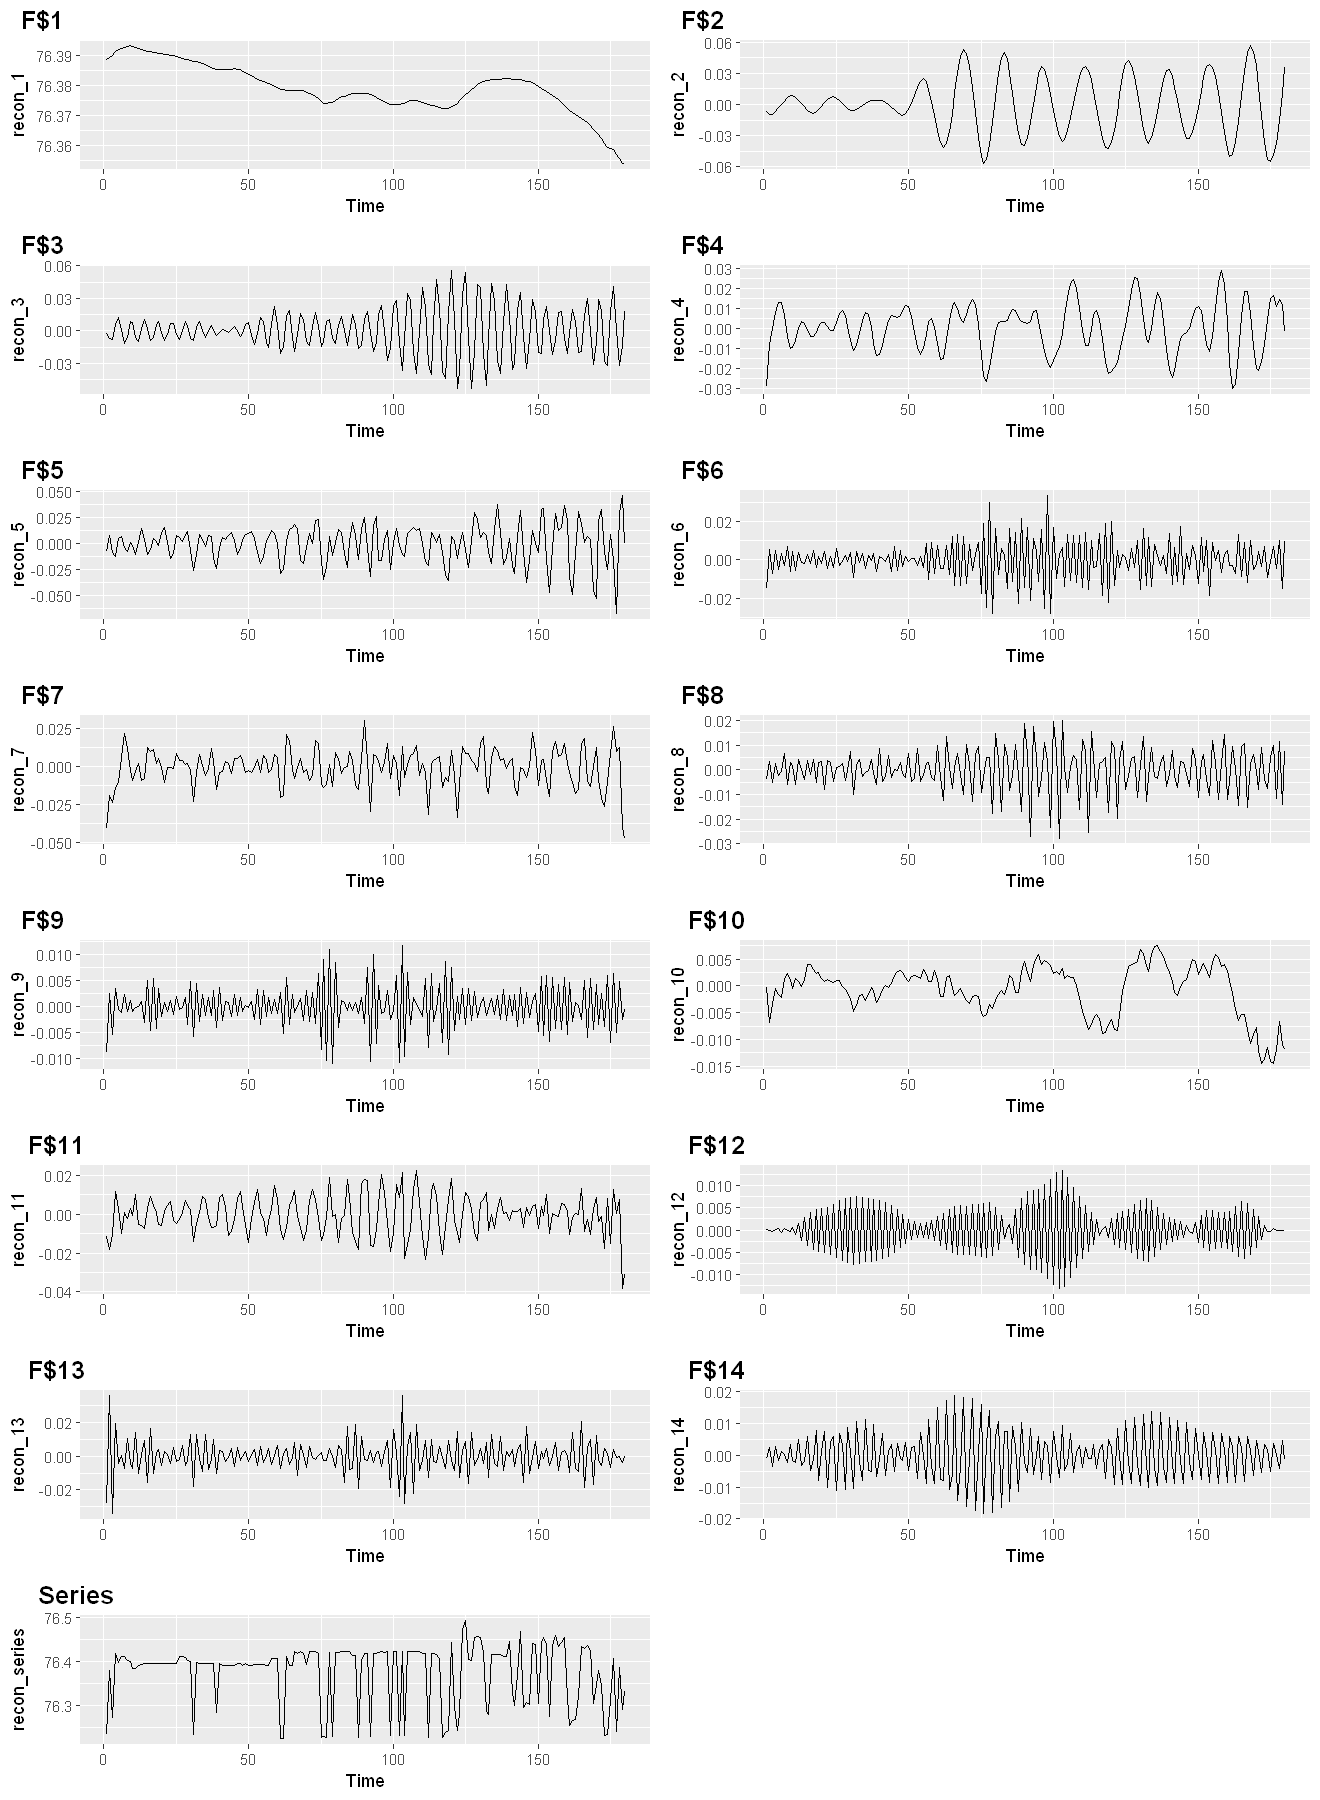

In [194]:
fig(11, 15)
ggarrange(rec_1, rec_2, rec_3, rec_4, rec_5, rec_6, rec_7, rec_8, rec_9, rec_10, rec_11, rec_12, rec_13, rec_14, rec_ser, 
          labels = c("F$1", "F$2", "F$3", "F$4", "F$5", "F$6", "F$7", "F$8", "F$9", "F$10", "F$11", "F$12", "F$13", "F$14", "Series"),
          ncol = 2, nrow = 8,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

__Посмотрим на распределение каждой из компонент и воспользуемся тестом Лиллиефорса (Колмогорова-Смирнова) для проверки объединенной компоненты на нормальность.__

In [92]:
hist_1  <- ggplot(recon$F1, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_2  <- ggplot(recon$F2, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_3  <- ggplot(recon$F3, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_4  <- ggplot(recon$F4, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_5  <- ggplot(recon$F5, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_6  <- ggplot(recon$F6, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_7  <- ggplot(recon$F7, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_8  <- ggplot(recon$F8, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_9  <- ggplot(recon$F9, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_10  <- ggplot(recon$F10, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_11  <- ggplot(recon$F11, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_12  <- ggplot(recon$F12, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_13  <- ggplot(recon$F13, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_14  <- ggplot(recon$F14, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

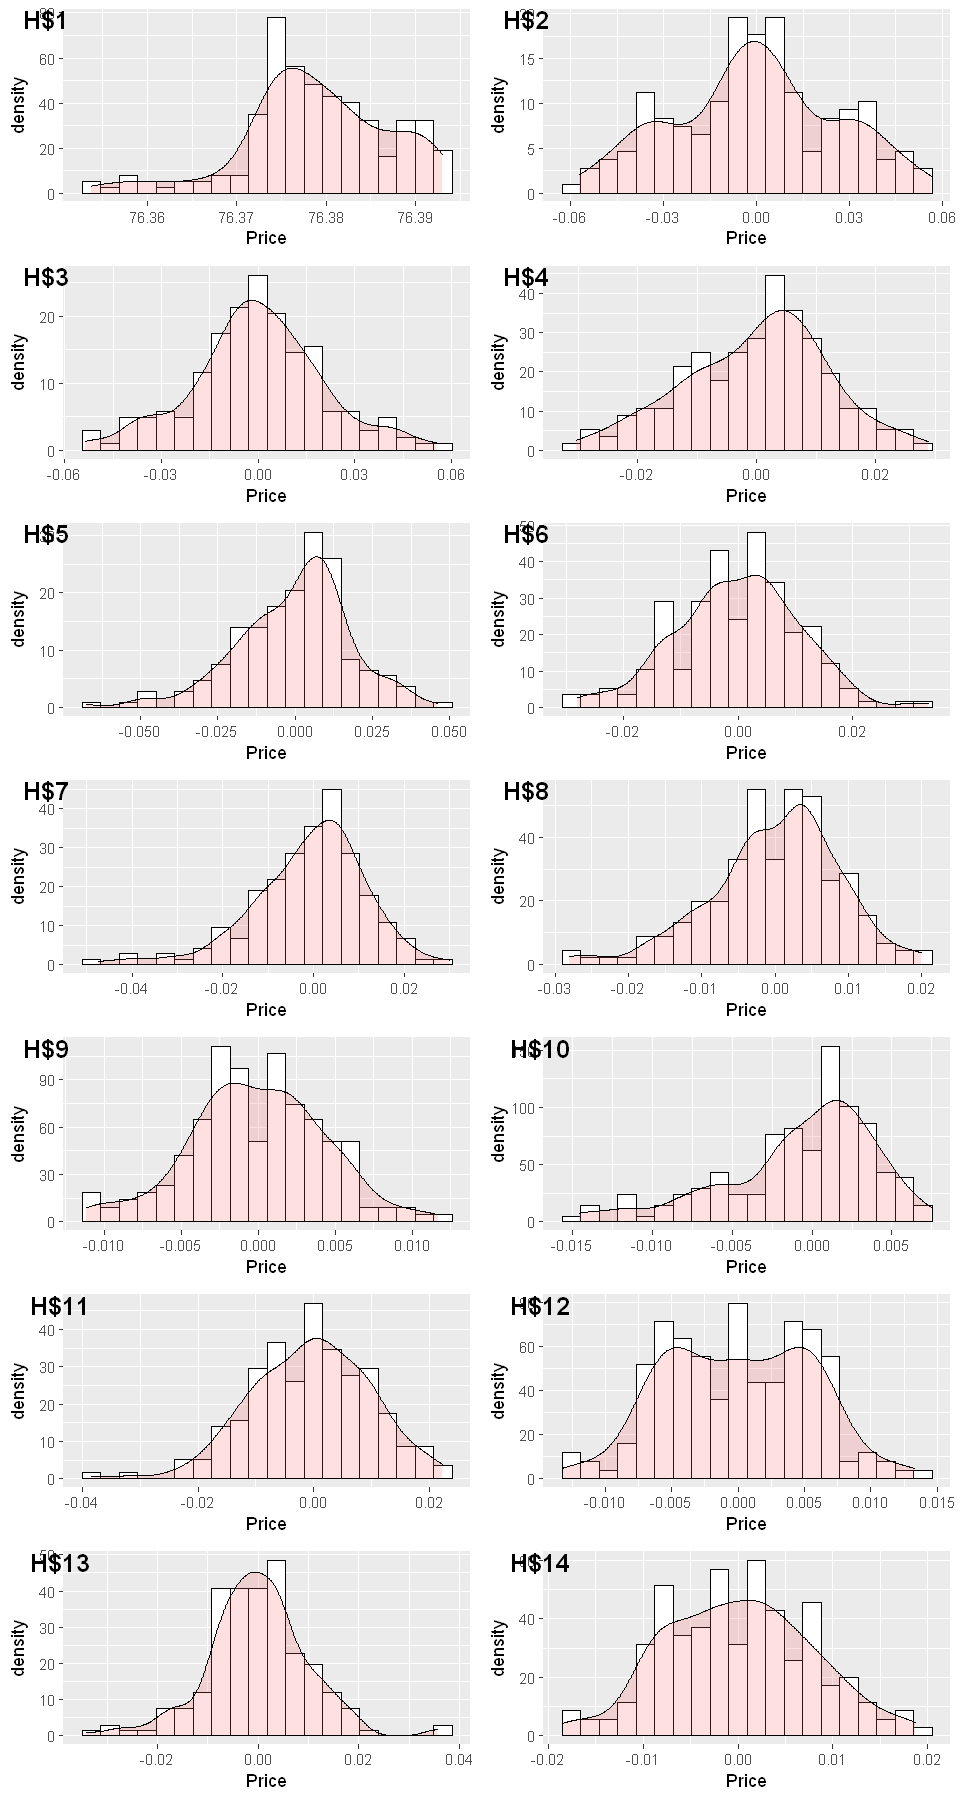

In [93]:
fig(8, 15)
ggarrange(hist_1, hist_2, hist_3, hist_4, hist_5, hist_6, hist_7, hist_8, hist_9, hist_10, hist_11, hist_12, hist_13, hist_14,
          labels = c("H$1", "H$2", "H$3", "H$4", "H$5", "H$6", "H$7", "H$8", "H$9", "H$10", "H$11", "H$12", "H$13", "H$14"),
          ncol = 2, nrow = 7,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

In [94]:
lillie.test(recon_1)
lillie.test(recon_2)
lillie.test(recon_3)
lillie.test(recon_4)
lillie.test(recon_5)
lillie.test(recon_6)
lillie.test(recon_7)
lillie.test(recon_8)
lillie.test(recon_9)
lillie.test(recon_10)
lillie.test(recon_11)
lillie.test(recon_12)
lillie.test(recon_13)
lillie.test(recon_14)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_1
D = 0.096283, p-value = 0.0003375



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_2
D = 0.067942, p-value = 0.04182



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_3
D = 0.051749, p-value = 0.282



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_4
D = 0.076491, p-value = 0.01214



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_5
D = 0.085203, p-value = 0.002839



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_6
D = 0.043205, p-value = 0.5668



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_7
D = 0.085032, p-value = 0.002926



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_8
D = 0.077518, p-value = 0.01033



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_9
D = 0.038097, p-value = 0.7556



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_10
D = 0.12089, p-value = 9.669e-07



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_11
D = 0.036892, p-value = 0.7956



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_12
D = 0.072333, p-value = 0.02268



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_13
D = 0.061767, p-value = 0.09095



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_14
D = 0.043695, p-value = 0.5485


__Напишем функцию для автоматизации процесса, которая на выходе будет выдавать номера компонент (групп), которые попадают под критерий шумовых компонент.__

In [151]:
test_lillie <- function(recon) {
    to_exclude = c()
    for (i in 1:length(recon)){
        to_check = as.ts(as.data.frame(recon[i]))
        p_value = as.numeric(lillie.test(to_check)[2])
        if (p_value >= 0.05) {
            to_exclude = c(to_exclude, i)
        }
    }
    return (to_exclude)
}

In [195]:
to_exclude = test_lillie(recon)
to_exclude

[1]  3  6  9 11 13 14

__Кажется, что наиболее близки к нормальному распределению 3, 6, 9, 11, 14 компоненты.__

Попробуем построить график реконструированного временного ряда и исходного, и очистить его от шума (то есть исключить эти компоненты и посмотреть, что изменится).

In [196]:
recon <- reconstruct(s, groups = list(unlist(groups[1:14])))
res <- residuals(recon)

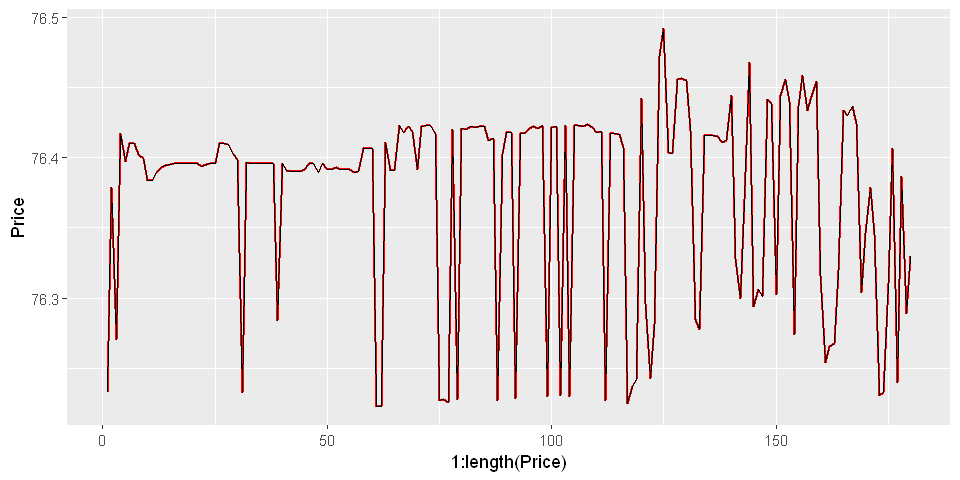

In [199]:
# Посмотрим сначала на ряд, реконструированный из всех компонент
# Он совпадает с исходным рядом

recon <- reconstruct(s, groups = list(unlist(groups[1:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

In [200]:
# Посмотрим на ряд с поочередно исключенной каждой компонентом, которая потенциально определена как шум

wo_3 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:2]), unlist(groups[4:14]))))$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))
wo_6 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:5]), unlist(groups[7:14]))))$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))
wo_9 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:8]), unlist(groups[10:14]))))$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))
wo_11 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:8]), unlist(groups[10:14]))))$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))
wo_14 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:13]))))$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

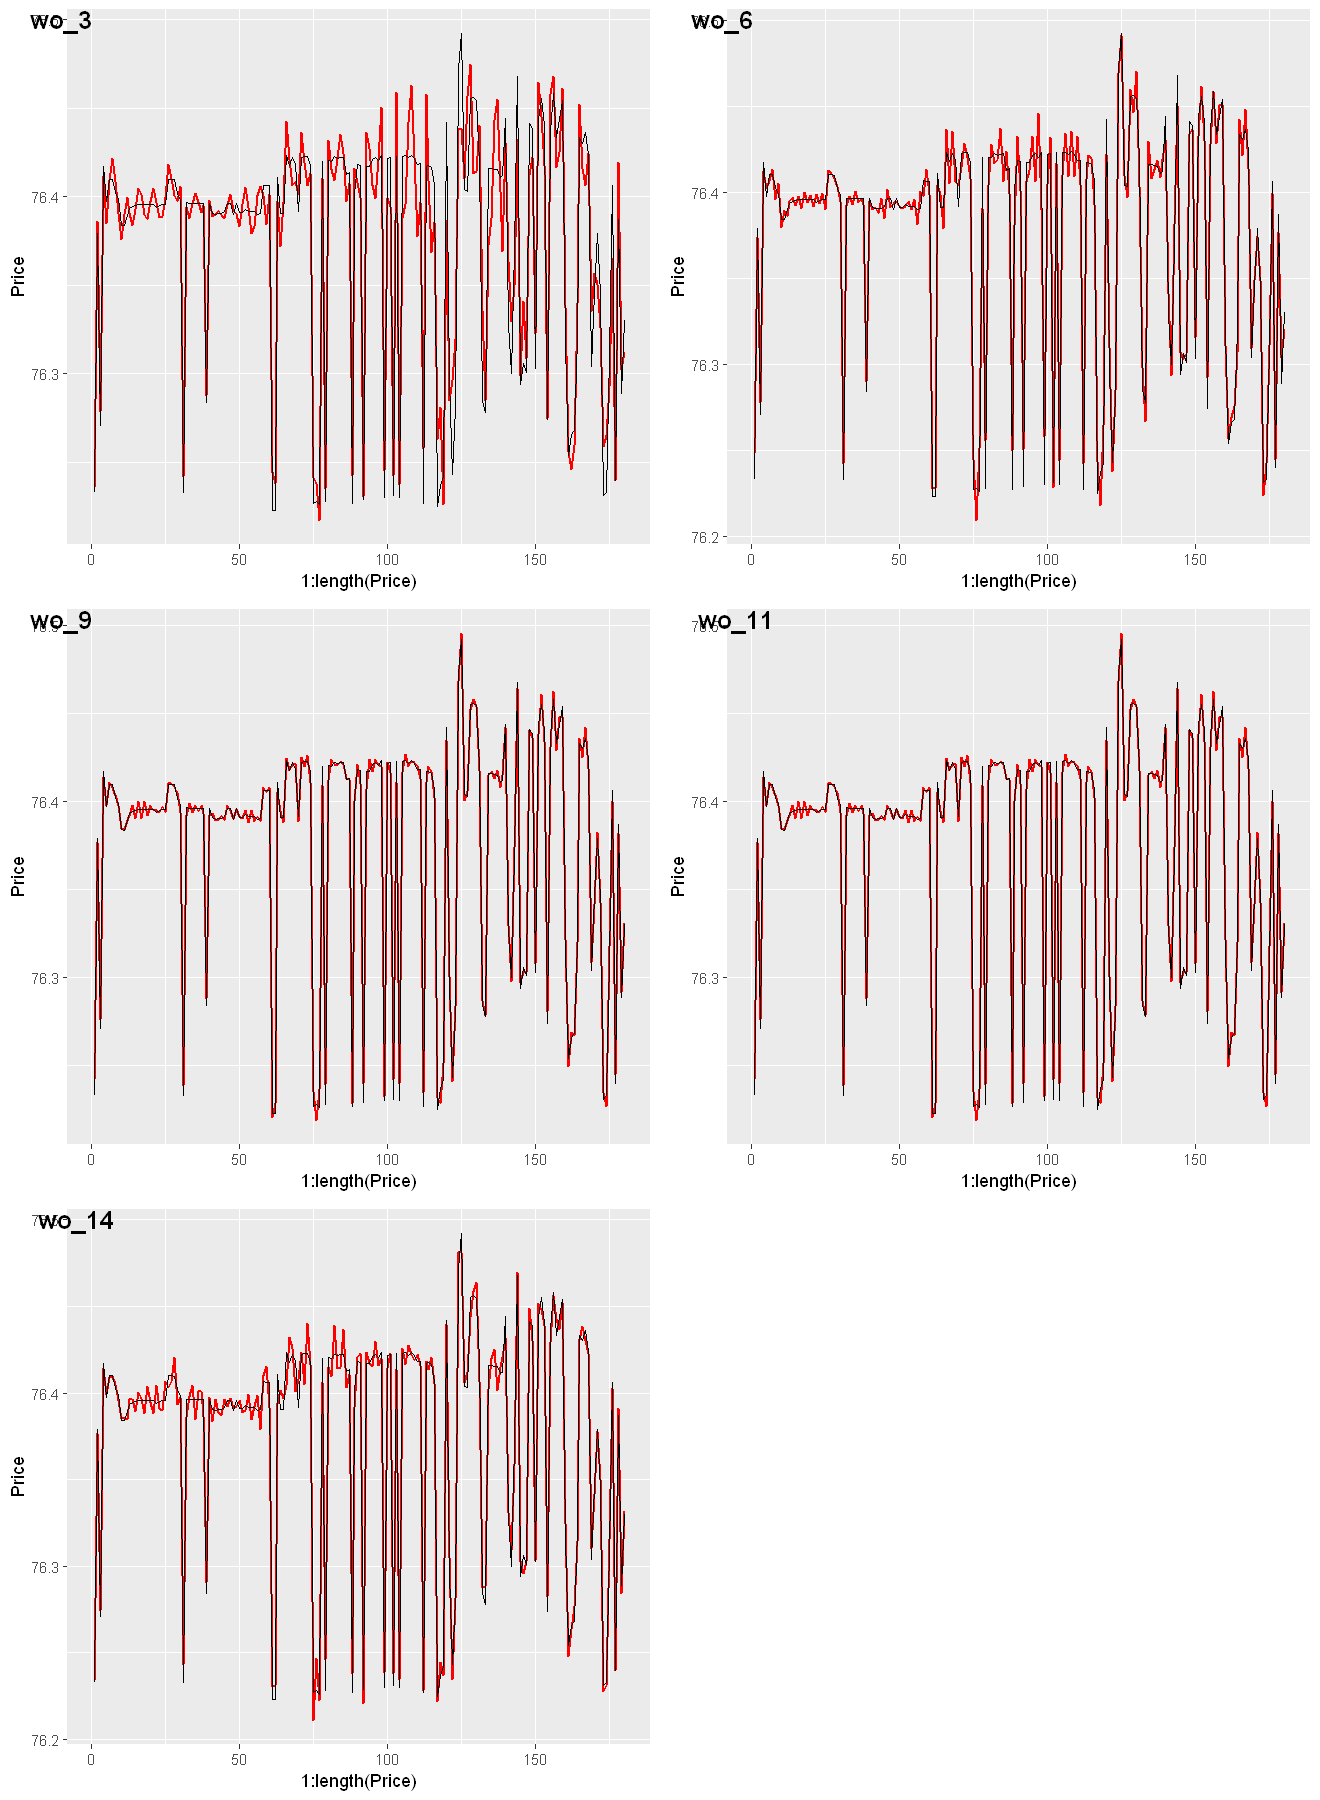

In [201]:
fig(11, 15)
ggarrange(wo_3, wo_6, wo_9, wo_11, wo_14,
          labels = c('wo_3', 'wo_6', 'wo_9', 'wo_11', 'wo_14'),
          ncol = 2, nrow = 3,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

__Кажется, что все, кроме 3 компоненты, можно спокойно представить как шум и скорректировать на этот шум.__ь

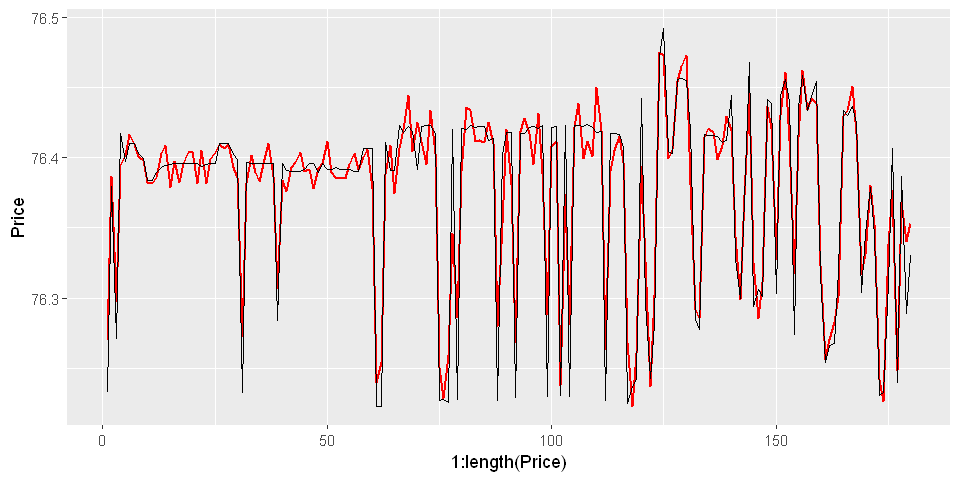

In [202]:
# Без 6, 9, 11, 14 компоненты

recon <- reconstruct(s, groups = list(c(unlist(groups[1:5]), unlist(groups[7:8]), unlist(groups[10]), unlist(groups[12:13]))))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

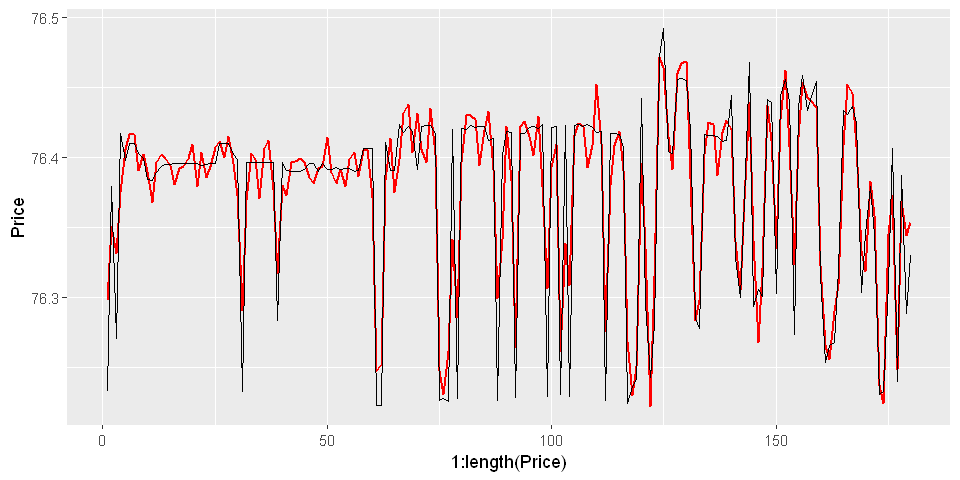

In [203]:
# Без 6, 9, 11, 14 компоненты и без 13 (там p-value > 0.05)

recon <- reconstruct(s, groups = list(c(unlist(groups[1:5]), unlist(groups[7:8]), unlist(groups[10]), unlist(groups[12]))))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

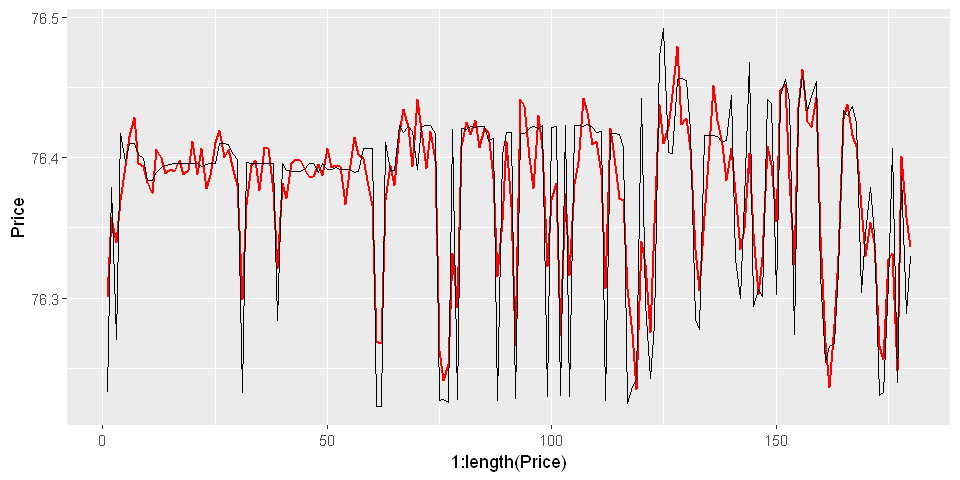

In [204]:
# Без 3, 6, 9, 11, 14 компоненты и без 13 (там p-value > 0.05)

recon <- reconstruct(s, groups = list(unlist(groups[-to_exclude])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

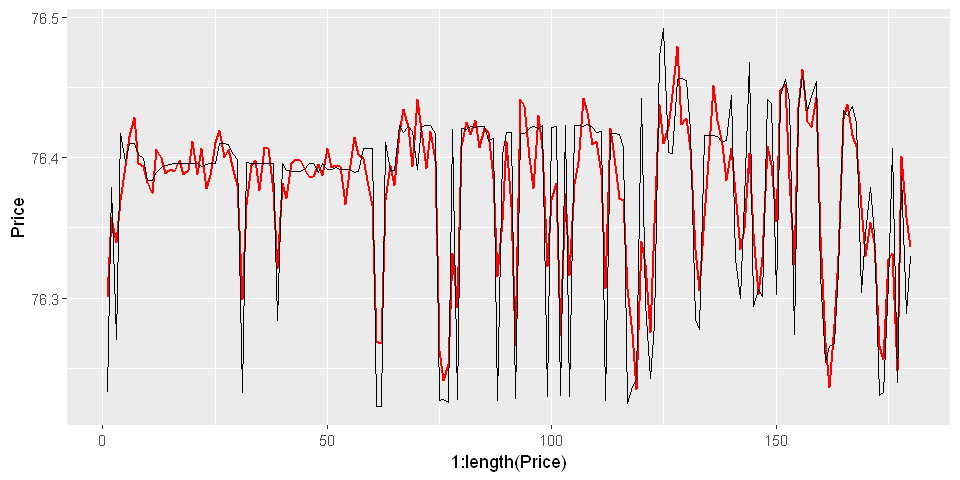

In [205]:
# Без 3, 6, 9, 11, 14 компоненты и без 13 (там p-value > 0.05)

recon <- reconstruct(s, groups = list(c(unlist(groups[1:2]), unlist(groups[4:5]), unlist(groups[7:8]), unlist(groups[10]), unlist(groups[12]))))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

__Вывод:__

- Думаю, что можно попробовать обучить ARIMA на двух последних очищенных вариантах и сравнить их с результатами на оригинальных данных

### ARIMA и предсказания

__На этом этапе буду использовать auto.ARIMA и делать предсказания для следующих трех наблюдений. Будем использовать следующие метрики качества: MSE, MAE, MAPE.__

In [206]:
X_wo_SSA = df_price 
X_SSA = recon$F1

y_test = data[181:183, ]
y_test = y_test$Price

In [207]:
print("Best ARIMA Model for Close Prices without SSA")
print(arimaorder(auto.arima(X_wo_SSA, approximation=FALSE)))

[1] "Best ARIMA Model for Close Prices without SSA"
p d q 
1 0 0 


In [208]:
ar_closes_wo_SSA <- arima(X_wo_SSA, order=c(1, 0, 0))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 9.1638, df = 8, p-value = 0.3287

Model df: 2.   Total lags used: 10



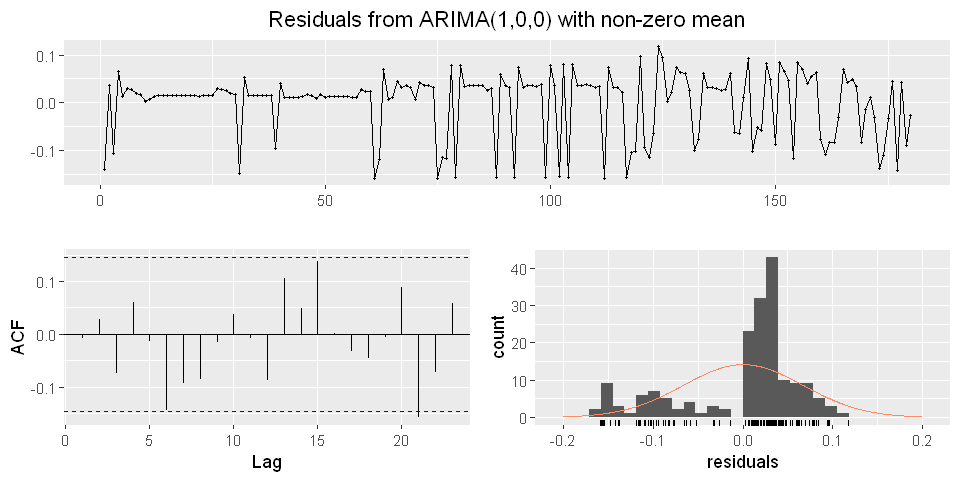

In [209]:
checkresiduals(ar_closes_wo_SSA)

In [210]:
summary(ar_closes_wo_SSA)


Call:
arima(x = X_wo_SSA, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2226    76.3756
s.e.  0.0735     0.0064

sigma^2 estimated as 0.004438:  log likelihood = 232.14,  aic = -458.27

Training set error measures:
                       ME       RMSE        MAE          MPE       MAPE    MASE
Training set 0.0001970605 0.06662203 0.05197999 0.0001818749 0.06809145 1.06055
                     ACF1
Training set -0.007298742


In [211]:
ar_closes_wo_SSA


Call:
arima(x = X_wo_SSA, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2226    76.3756
s.e.  0.0735     0.0064

sigma^2 estimated as 0.004438:  log likelihood = 232.14,  aic = -458.27

In [212]:
forecast::forecast(ar_closes_wo_SSA, h=3)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
181       76.36542 76.28004 76.45080 76.23484 76.49599
182       76.37330 76.28583 76.46077 76.23953 76.50707
183       76.37505 76.28748 76.46263 76.24112 76.50898

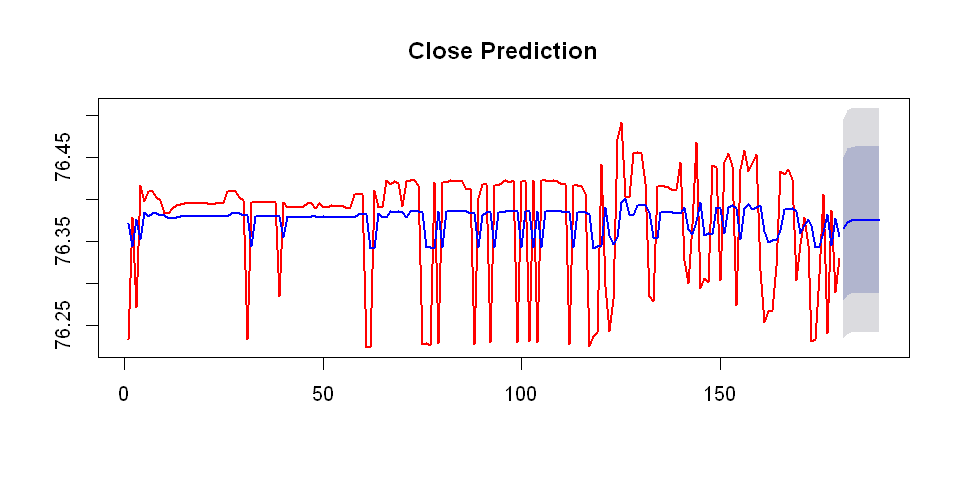

In [213]:
plot(forecast::forecast(ar_closes_wo_SSA), main='Close Prediction', lwd = 2, type="l", col="red")
lines(fitted(ar_closes_wo_SSA),col="blue", lwd = 2)
# Добавляем цены закрытия (красные) и предсказания цен закрытия (синие)

In [214]:
print('Close Price Predictions')
pred_closes_wo_SSA <- predict(ar_closes_wo_SSA, n.ahead = 3)

print(pred_closes_wo_SSA)

[1] "Close Price Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 76.36542 76.37330 76.37505

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.06662203 0.06825277 0.06833257



In [215]:
MAE_closes_wo_SSA <- MAE(pred_closes_wo_SSA$pred, y_test)
MSE_closes_wo_SSA <- MSE(pred_closes_wo_SSA$pred, y_test)
MAPE_closes_wo_SSA <- MAPE(pred_closes_wo_SSA$pred, y_test)

***

In [216]:
print("Best ARIMA Model for Close Prices with SSA")
print(arimaorder(auto.arima(X_SSA, approximation=FALSE)))

[1] "Best ARIMA Model for Close Prices with SSA"
p d q 
1 0 1 


In [217]:
ar_closes_with_SSA <- Arima(X_SSA, order=c(1, 0, 1))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 46.755, df = 7, p-value = 6.23e-08

Model df: 3.   Total lags used: 10



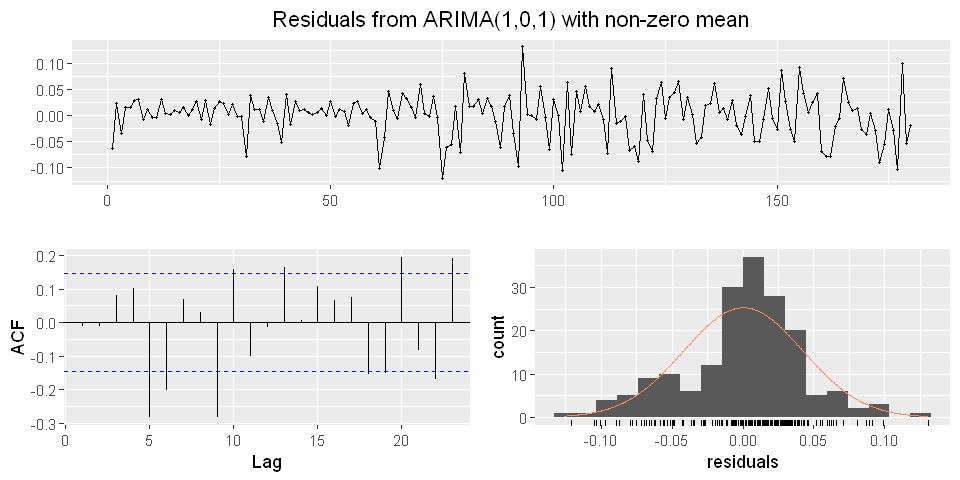

In [218]:
checkresiduals(ar_closes_with_SSA)

In [219]:
summary(ar_closes_with_SSA)

Series: X_SSA 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.3809  0.2491  76.3761
s.e.  0.1265  0.1356   0.0063

sigma^2 estimated as 0.001788:  log likelihood=315.31
AIC=-622.61   AICc=-622.38   BIC=-609.84

Training set error measures:
                       ME       RMSE        MAE          MPE       MAPE
Training set 0.0002512769 0.04193013 0.03120228 0.0002988602 0.04086312
                  MASE        ACF1
Training set 0.8801559 -0.01104914


In [220]:
ar_closes_with_SSA

Series: X_SSA 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.3809  0.2491  76.3761
s.e.  0.1265  0.1356   0.0063

sigma^2 estimated as 0.001788:  log likelihood=315.31
AIC=-622.61   AICc=-622.38   BIC=-609.84

In [221]:
forecast::forecast(ar_closes_with_SSA, h=3)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
181       76.35594 76.30176 76.41013 76.27307 76.43882
182       76.36840 76.30435 76.43245 76.27045 76.46635
183       76.37315 76.30779 76.43850 76.27320 76.47310

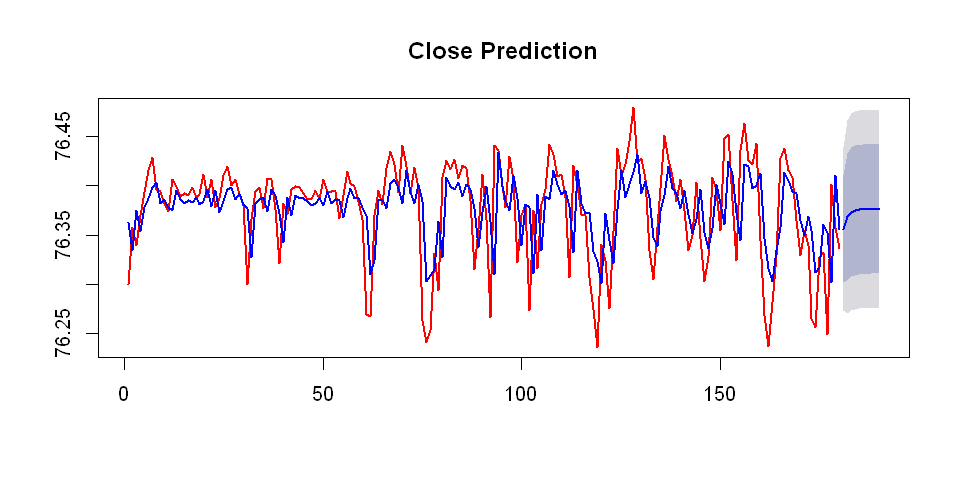

In [222]:
plot(forecast::forecast(ar_closes_with_SSA), main='Close Prediction', lwd = 2, type="l", col="red")
lines(fitted(ar_closes_with_SSA),col="blue", lwd = 2)
# Добавляем цены закрытия (красные) и предсказания цен закрытия (синие)

In [223]:
print('Close Price Predictions')
pred_closes_with_SSA <- predict(ar_closes_with_SSA, n.ahead = 3)

print(pred_closes_with_SSA)

[1] "Close Price Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 76.35594 76.36840 76.37315

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.04228398 0.04997633 0.05099630



In [224]:
MAE_closes_with_SSA <- MAE(pred_closes_with_SSA$pred, y_test)
MSE_closes_with_SSA <- MSE(pred_closes_with_SSA$pred, y_test)
MAPE_closes_with_SSA <- MAPE(pred_closes_with_SSA$pred, y_test)

In [225]:
results <- data.frame(
    metrics = c('MSE', 'MAE', 'MAPE'),
    wo_SSA = c(MSE_closes_wo_SSA, MAE_closes_wo_SSA, MAPE_closes_wo_SSA),
    with_SSA = c(MSE_closes_with_SSA, MAE_closes_with_SSA, MAPE_closes_with_SSA)
)
results

metrics,wo_SSA,with_SSA
MSE,0.0073336498,0.007118405
MAE,0.0696235046,0.067463380
MAPE,0.0009127206,0.000884390


In [226]:
(0.0073336498 - 0.0070049045) / 0.0073336498

[1] 0.04482697

In [227]:
(- 0.0678307281 + 0.0696235046) / 0.0696235046

[1] 0.02574959

__Итог: модель ARIMA, обученная на очищенных данных, имеет показатели совсем немного, но лучше, чем ARIMA, обученная на исходных данных.__

## Доходности

### Разложение

In [228]:
head(df_returns)

,Returns
2021-04-20 00:03:00,0.0019164929
2021-04-20 00:05:00,-0.0014153086
2021-04-20 00:06:00,0.0019142269
2021-04-20 00:08:00,-0.0002551788
2021-04-20 00:11:00,0.0001636179
2021-04-20 00:12:00,0.0000000000


In [229]:
# Стадия декомпозиции
L = 30  # Окно
s <- ssa(df_returns, L = L)

In [230]:
s


Call:
ssa(x = df_returns, L = L)

Series length: 180,	Window length: 30,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 30,	Eigenvectors: 30,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.02718 MiB

In [231]:
df_all_norms = as.data.frame(s$sigma)
colnames(df_all_norms) = c('values')

df_wo_first = as.data.frame((s$sigma)[2:30])
colnames(df_wo_first) = c('values')

df_log = as.data.frame(log(s$sigma))
colnames(df_log) = c('values')

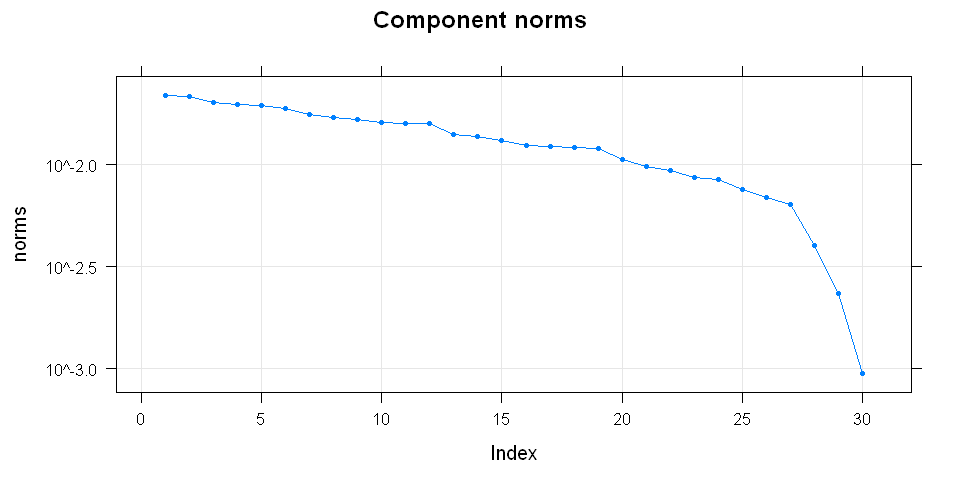

In [232]:
fig(8, 4)
plot(s) # Собственные числа

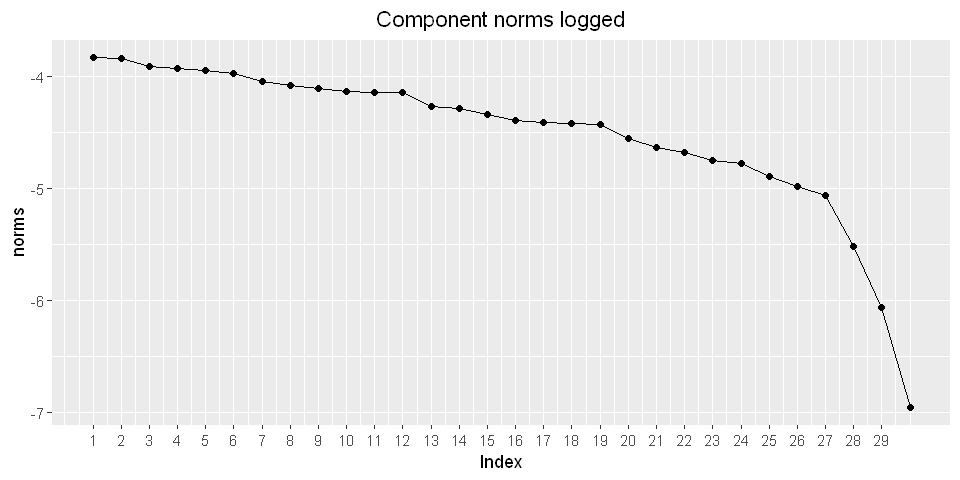

In [233]:
ggplot(data=df_log, aes(x=1:(length(values)), y=values)) + 
    geom_line() +
    scale_x_continuous(breaks = 1:(length(df_wo_first$values)), labels=1:(length(df_wo_first$values))) +
    geom_point() +
    ggtitle("Component norms logged") + xlab("Index") + ylab("norms")

__Видим иную картину, нежели на кривой доходности, здесь нет компоненты, которая бы значительно отличалась от других по собственному значению (компоненты явного тренда).__

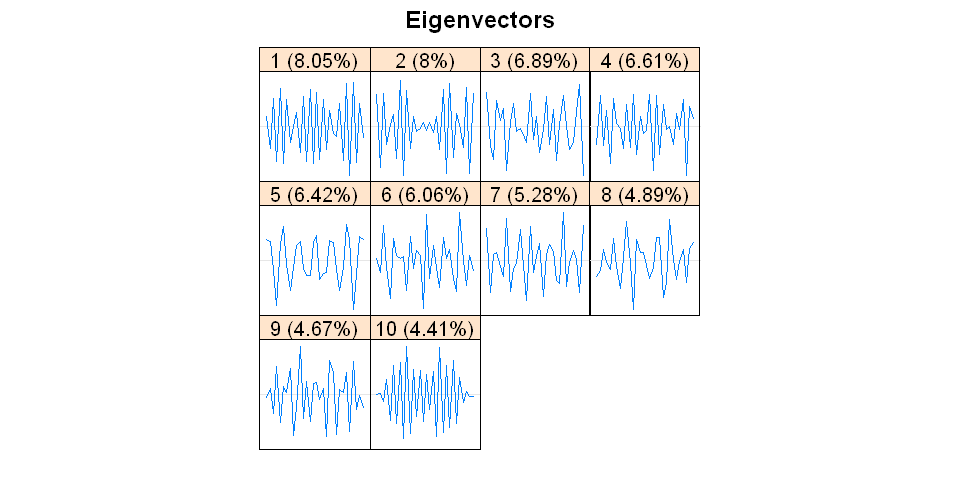

In [234]:
plot(s, type = "vectors") # Собственные векторы

### Группировка и реконструкция

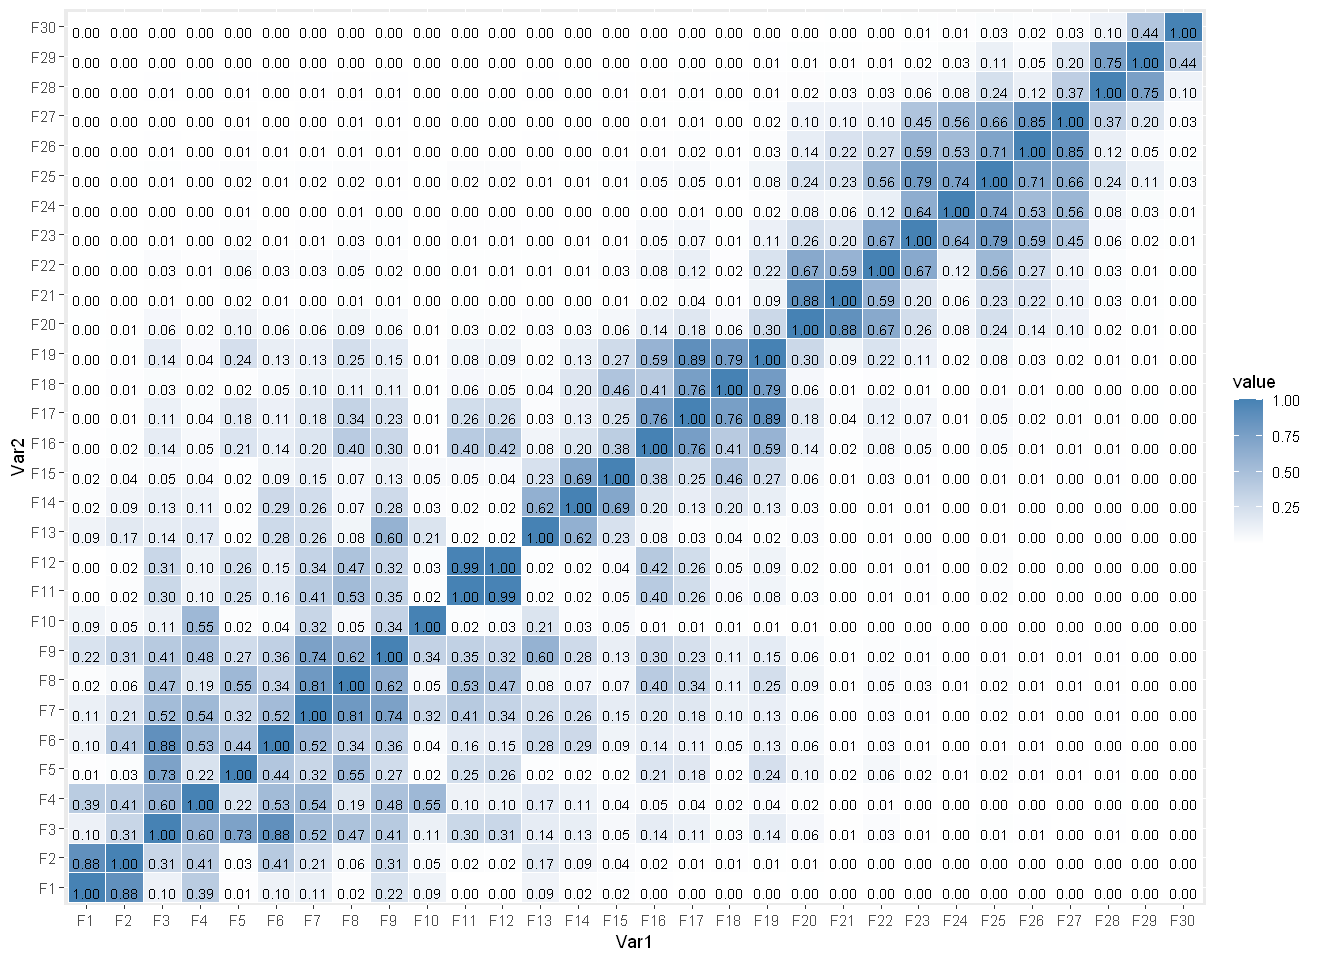

In [235]:
corr <- melt(wcor(s)[-31, ])  # Корреляции в более удобном формате для сравнений

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

In [236]:
groups = group_by_max_corr(corr)
groups

[[1]]
[1] 1 2

[[2]]
[1] 3 6 5

[[3]]
[1] 4

[[4]]
[1] 7 8 9

[[5]]
[1] 10

[[6]]
[1] 11 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16 17 19 18

[[10]]
[1] 20 21 22

[[11]]
[1] 23 25 24 26 27

[[12]]
[1] 28 29

[[13]]
[1] 30

In [237]:
recon <- reconstruct(s, groups = groups)
res <- residuals(recon)

In [238]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_3 <- as.ts(recon$F3)
recon_4 <- as.ts(recon$F4)
recon_5 <- as.ts(recon$F5)
recon_6 <- as.ts(recon$F6)
recon_7 <- as.ts(recon$F7)
recon_8 <- as.ts(recon$F8)
recon_9 <- as.ts(recon$F9)
recon_10 <- as.ts(recon$F10)
recon_11 <- as.ts(recon$F11)
recon_12 <- as.ts(recon$F12)
recon_13 <- as.ts(recon$F13)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_3 <- autoplot(recon_3)
rec_4 <- autoplot(recon_4)
rec_5 <- autoplot(recon_5)
rec_6 <- autoplot(recon_6)
rec_7 <- autoplot(recon_7)
rec_8 <- autoplot(recon_8)
rec_9 <- autoplot(recon_9)
rec_10 <- autoplot(recon_10)
rec_11 <- autoplot(recon_11)
rec_12 <- autoplot(recon_12)
rec_13 <- autoplot(recon_13)
rec_ser <- autoplot(recon_series)

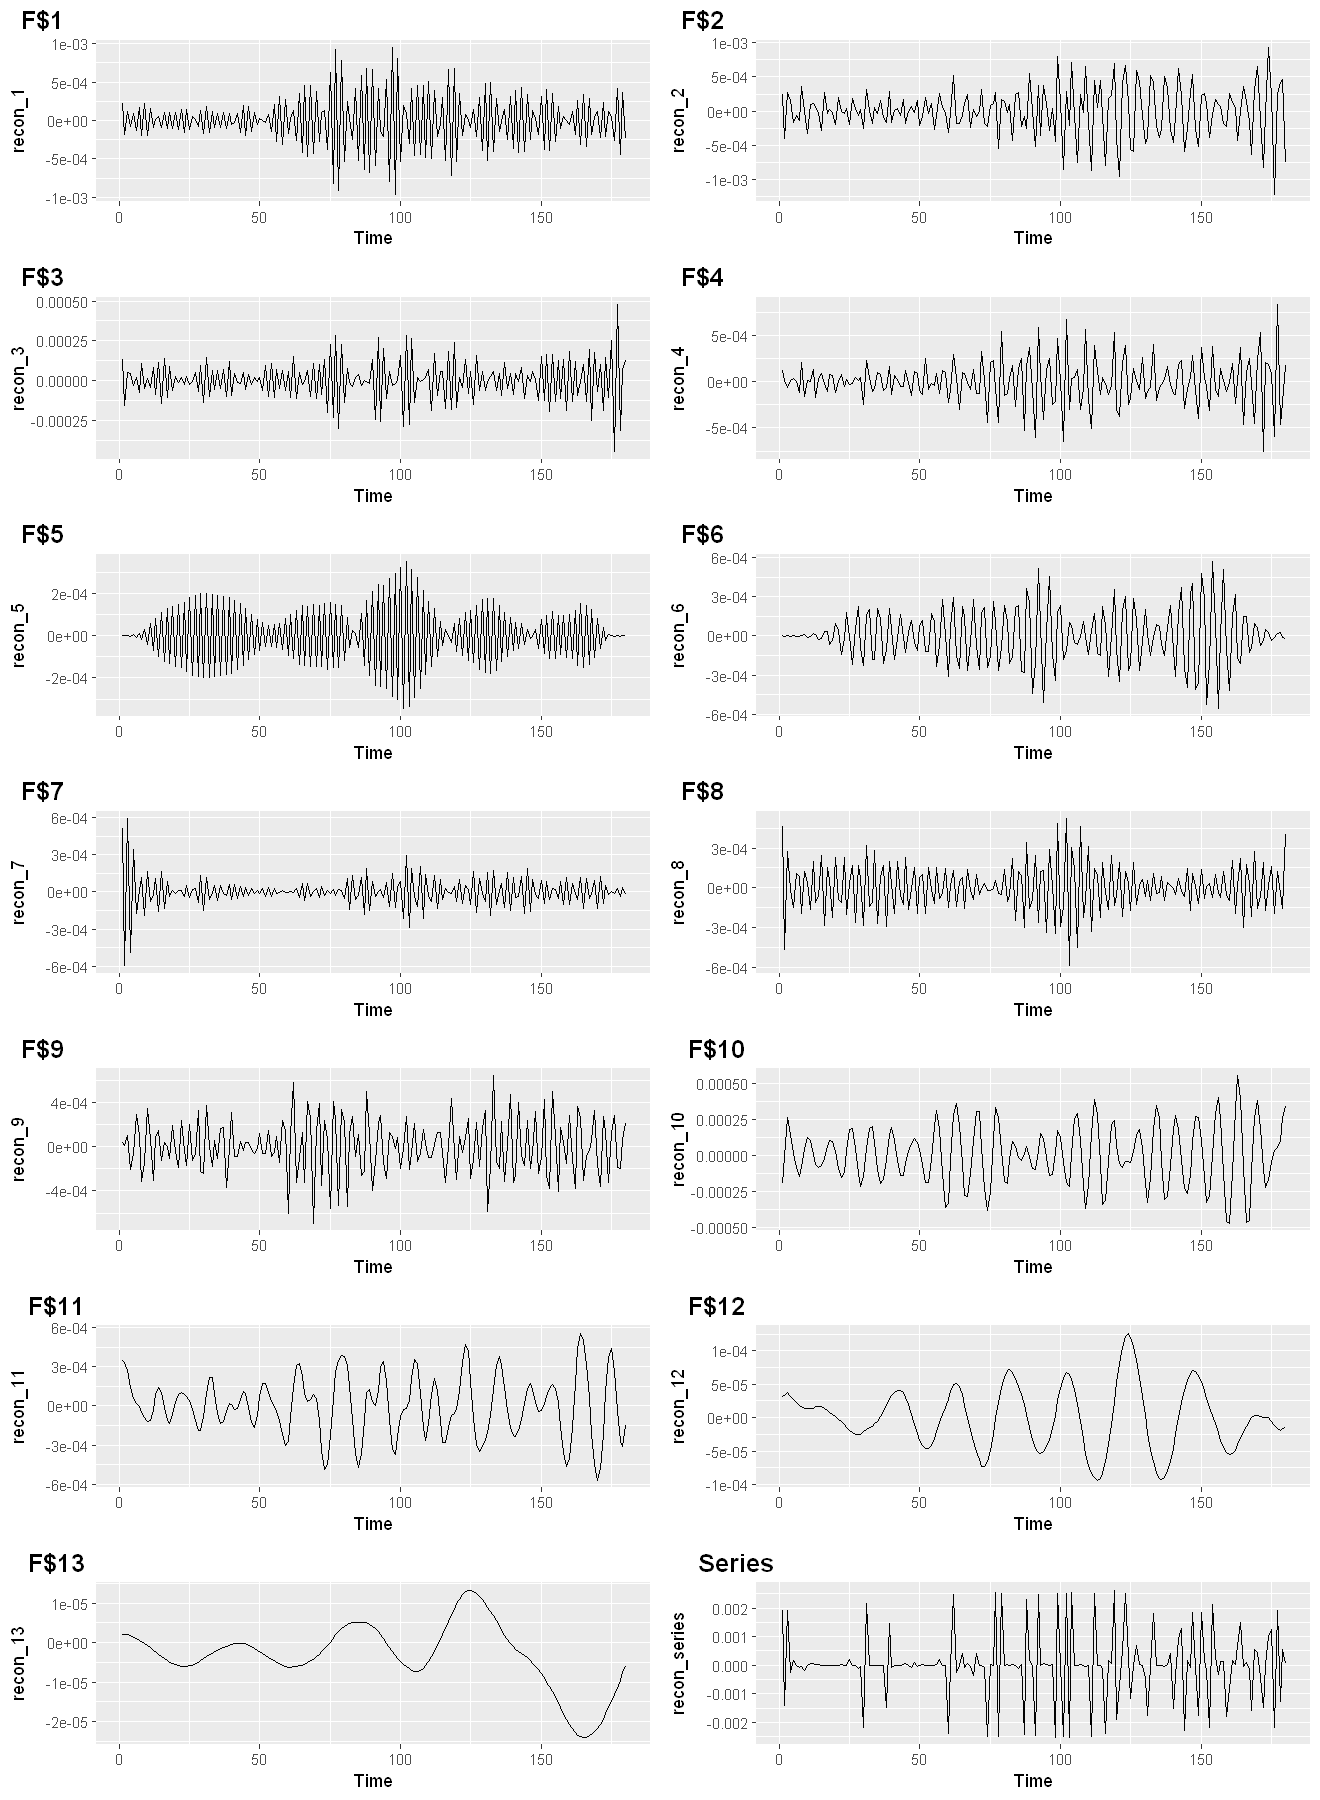

In [239]:
fig(11, 15)
ggarrange(rec_1, rec_2, rec_3, rec_4, rec_5, rec_6, rec_7, rec_8, rec_9, rec_10, rec_11, rec_12, rec_13, rec_ser, 
          labels = c("F$1", "F$2", "F$3", "F$4", "F$5", "F$6", "F$7", "F$8", "F$9", "F$10", "F$11", "F$12", "F$13", "Series"),
          ncol = 2, nrow = 7,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

In [240]:
hist_1  <- ggplot(recon$F1, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_2  <- ggplot(recon$F2, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_3  <- ggplot(recon$F3, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_4  <- ggplot(recon$F4, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_5  <- ggplot(recon$F5, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_6  <- ggplot(recon$F6, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_7  <- ggplot(recon$F7, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_8  <- ggplot(recon$F8, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_9  <- ggplot(recon$F9, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_10  <- ggplot(recon$F10, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_11  <- ggplot(recon$F11, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_12  <- ggplot(recon$F12, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_13  <- ggplot(recon$F13, aes(x=Returns)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

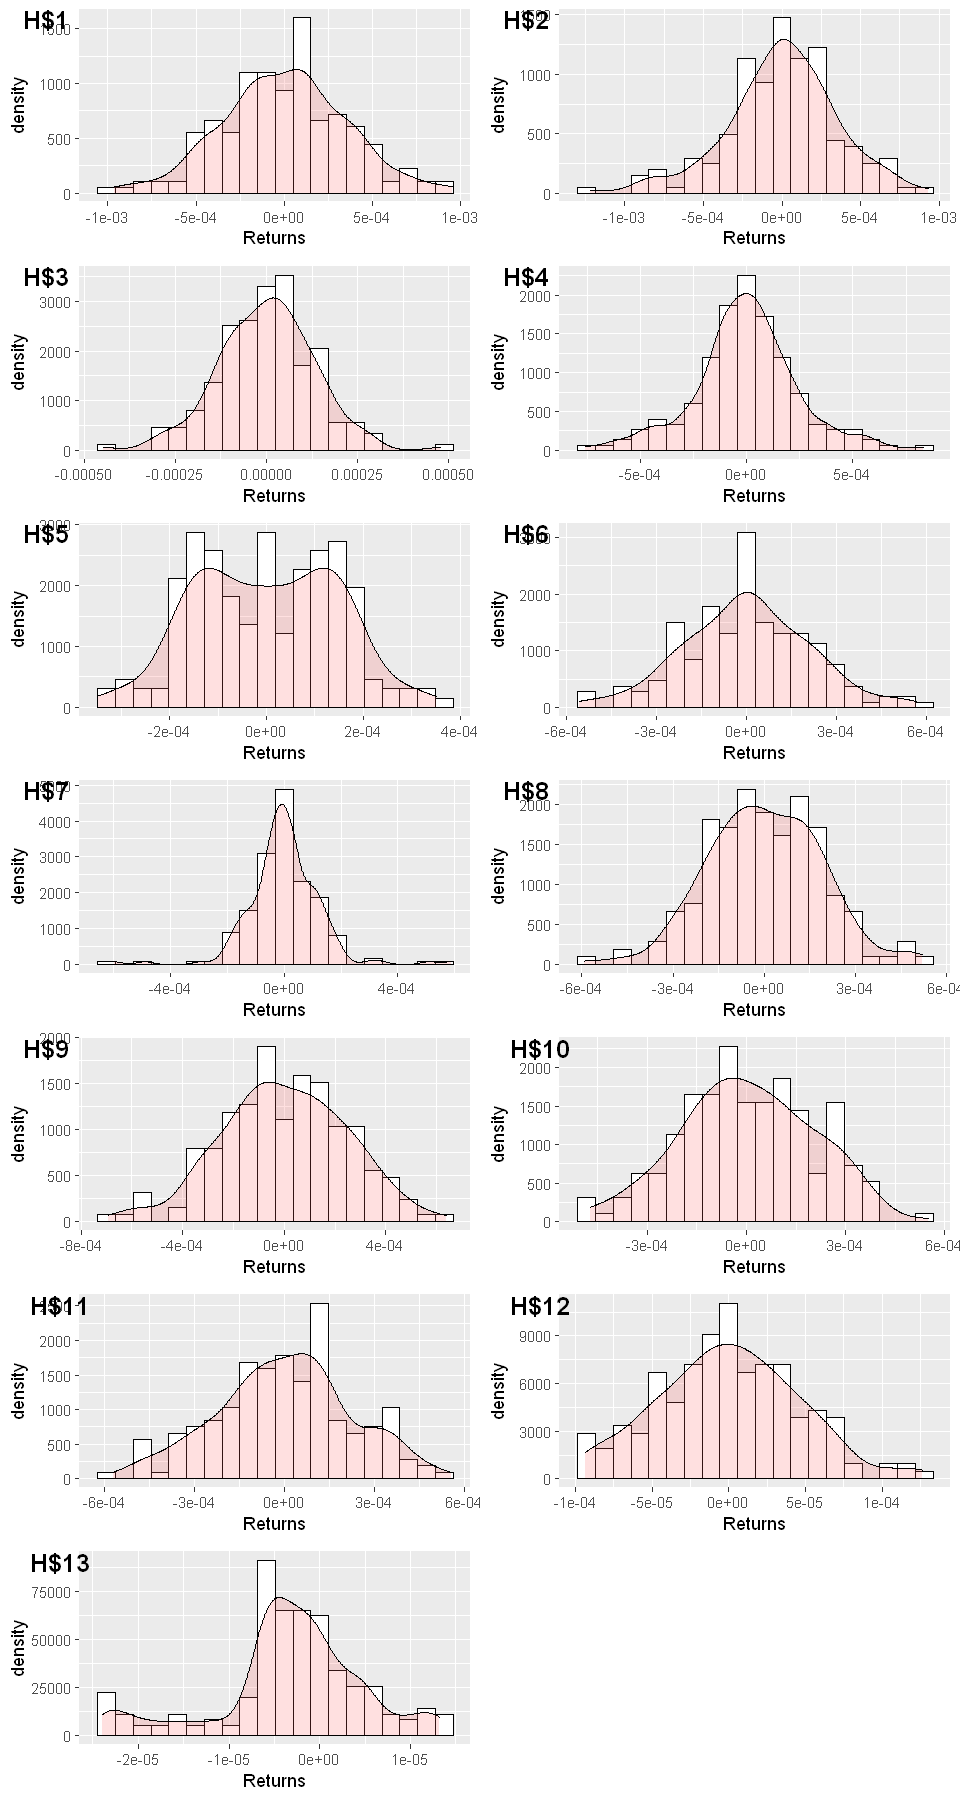

In [241]:
fig(8, 15)
ggarrange(hist_1, hist_2, hist_3, hist_4, hist_5, hist_6, hist_7, hist_8, hist_9, hist_10, hist_11, hist_12, hist_13,
          labels = c("H$1", "H$2", "H$3", "H$4", "H$5", "H$6", "H$7", "H$8", "H$9", "H$10", "H$11", "H$12", "H$13"),
          ncol = 2, nrow = 7,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

In [242]:
lillie.test(recon_1)
lillie.test(recon_2)
lillie.test(recon_3)
lillie.test(recon_4)
lillie.test(recon_5)
lillie.test(recon_6)
lillie.test(recon_7)
lillie.test(recon_8)
lillie.test(recon_9)
lillie.test(recon_10)
lillie.test(recon_11)
lillie.test(recon_12)
lillie.test(recon_13)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_1
D = 0.039218, p-value = 0.7156



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_2
D = 0.073042, p-value = 0.02045



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_3
D = 0.03732, p-value = 0.7824



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_4
D = 0.077133, p-value = 0.01098



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_5
D = 0.068061, p-value = 0.04116



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_6
D = 0.048859, p-value = 0.3677



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_7
D = 0.086656, p-value = 0.002186



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_8
D = 0.030774, p-value = 0.9461



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_9
D = 0.029251, p-value = 0.9674



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_10
D = 0.039945, p-value = 0.689



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_11
D = 0.040647, p-value = 0.6629



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_12
D = 0.034546, p-value = 0.8649



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_13
D = 0.15202, p-value = 6.346e-11


__Как шумовые можно определить следующие компоненты:__
- 9 (0.9674)
- 8 (0.9461)
- 12 (0.8649)
- 3 (0.7824)
- 1 (0.7156)
- 10 (0.689)
- 11 (0.6629)
- 6 (0.3677)

In [243]:
to_exclude <- test_lillie(recon)
to_exclude

[1]  1  3  6  8  9 10 11 12

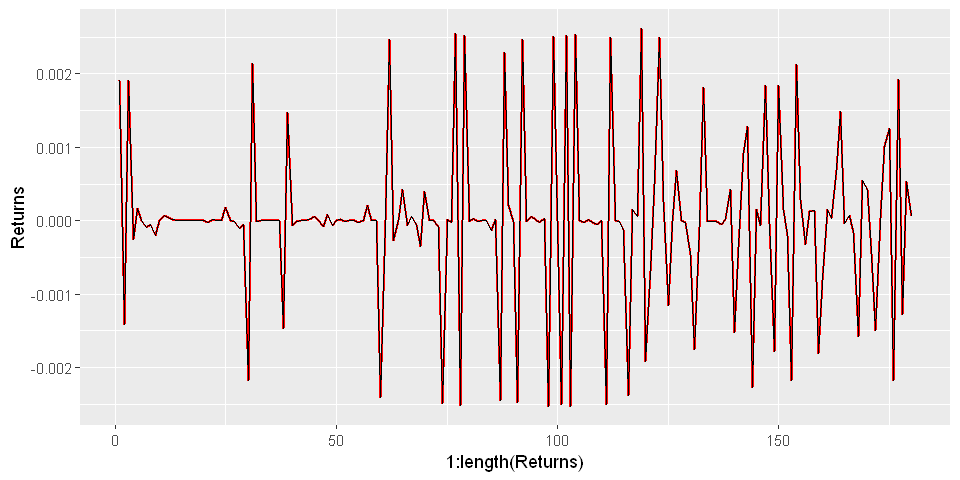

In [244]:
# Посмотрим сначала на ряд, реконструированный из всех компонент
# Он совпадает с исходным рядом

recon <- reconstruct(s, groups = list(unlist(groups[1:13])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))

In [245]:
# Посмотрим на ряд с поочередно исключенной каждой компонентом, которая потенциально определена как шум

wo_9 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:8]), unlist(groups[10:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_8 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:7]), unlist(groups[9:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_12 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:11]), unlist(groups[13:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_3 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:2]), unlist(groups[4:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_1 <- ggplot() + geom_line(data=reconstruct(s, groups = list(unlist(groups[2:13])))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_10 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:9]), unlist(groups[11:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_11 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:8]), unlist(groups[10:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))
wo_6 <- ggplot() + geom_line(data=reconstruct(s, groups = list(c(unlist(groups[1:5]), unlist(groups[7:13]))))$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) + geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))

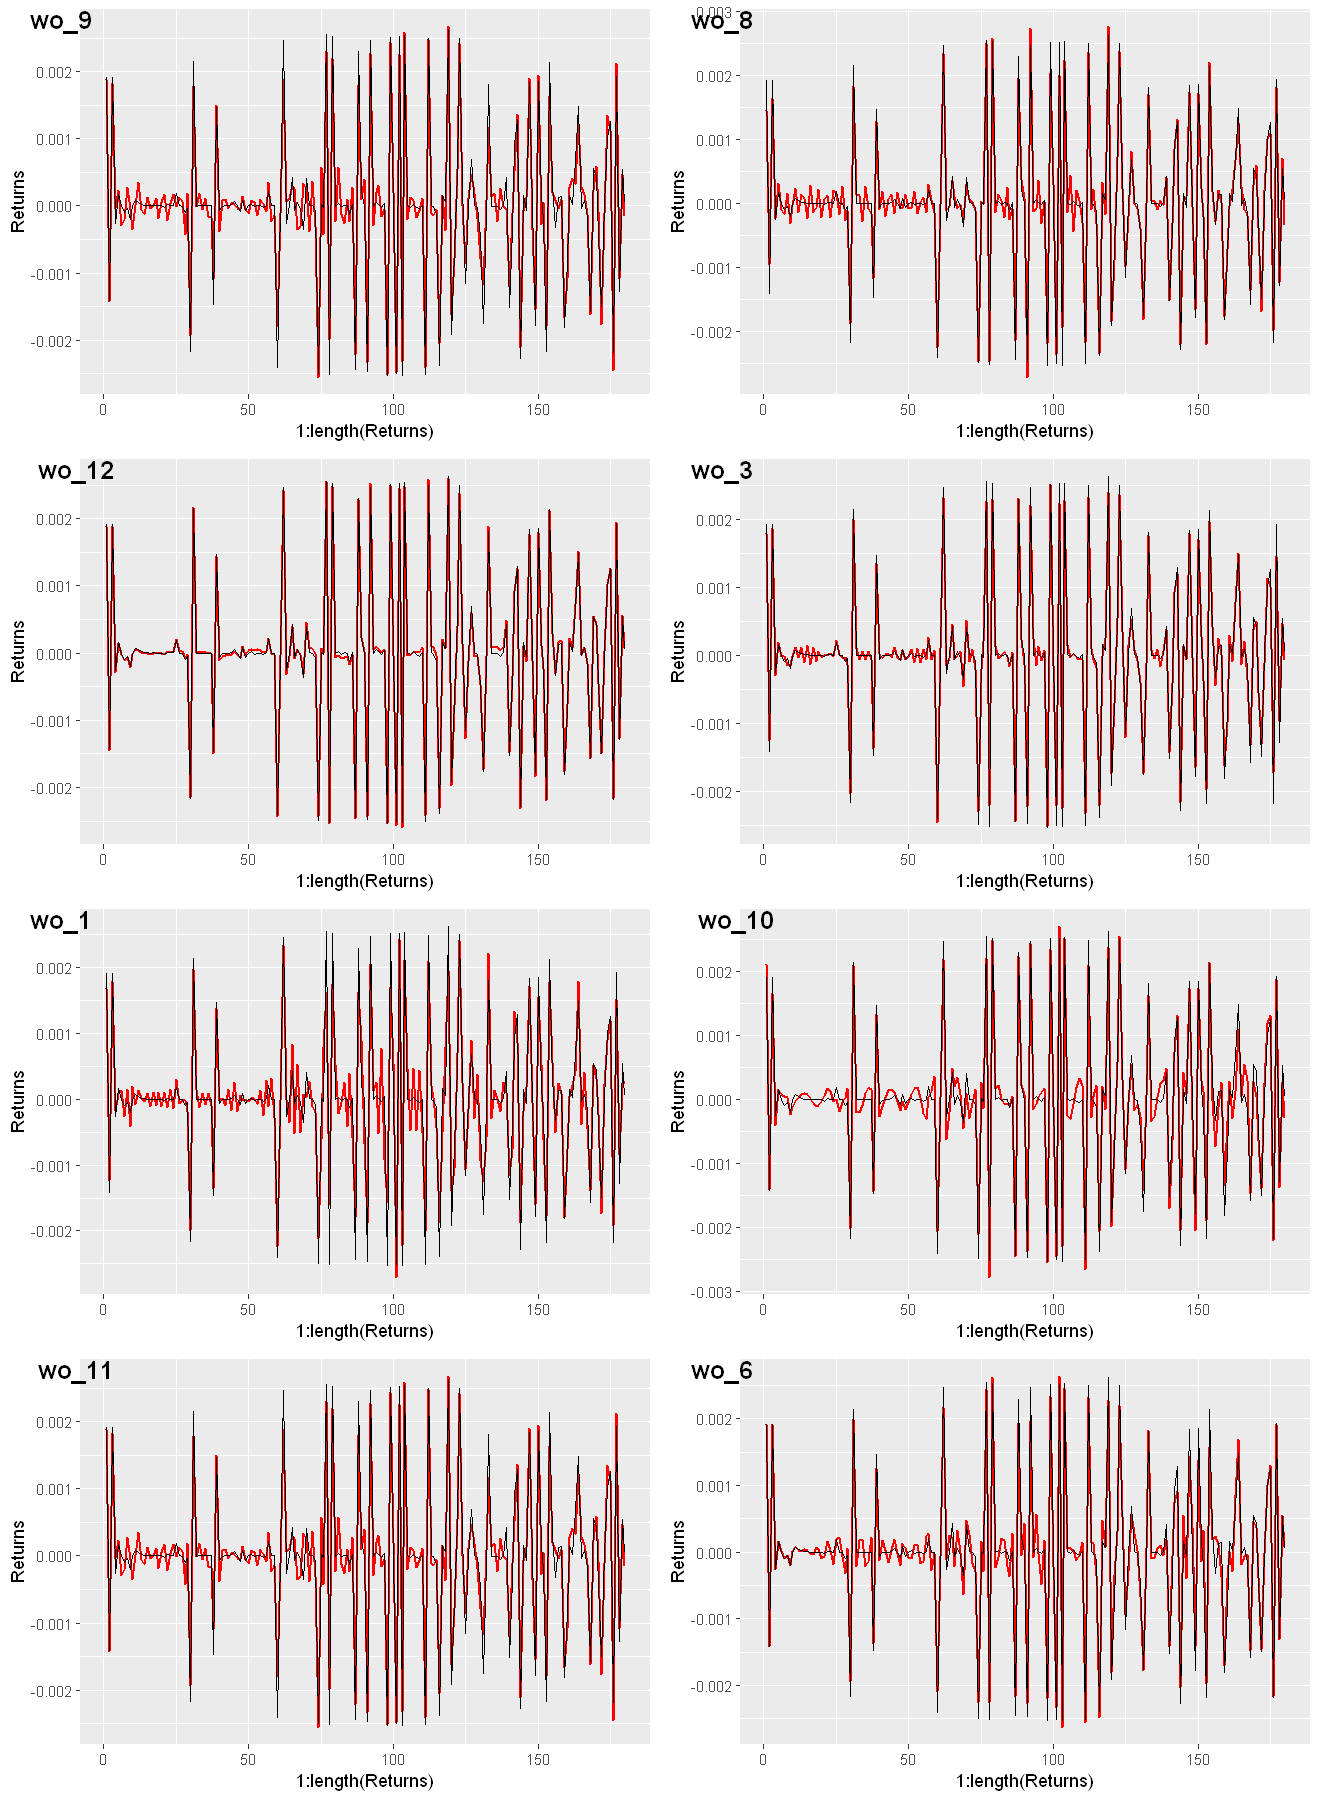

In [246]:
fig(11, 15)
ggarrange(wo_9, wo_8, wo_12, wo_3, wo_1, wo_10, wo_11, wo_6,
          labels = c('wo_9', 'wo_8', 'wo_12', 'wo_3', 'wo_1', 'wo_10', 'wo_11', 'wo_6'),
          ncol = 2, nrow = 4,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

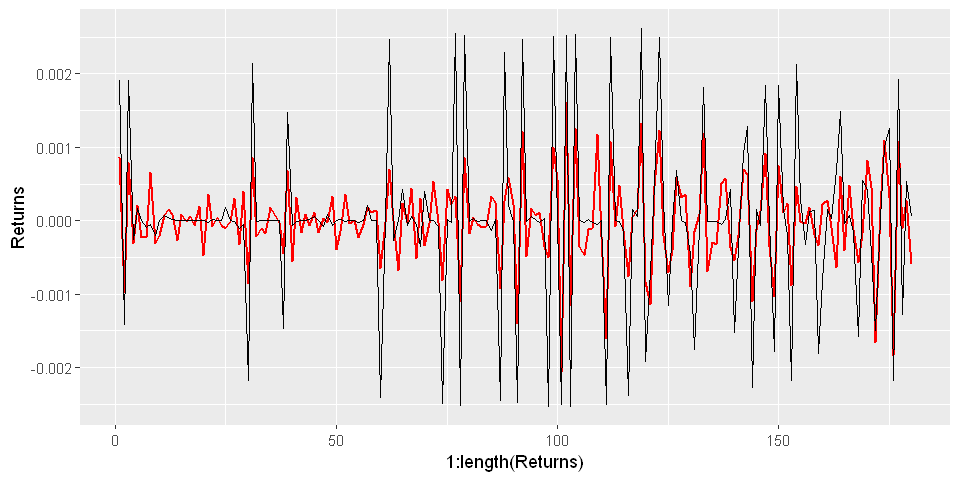

In [247]:
# Посмотрим на ряд с исключенными компонентами, которые потенциально определены как шум

recon <- reconstruct(s, groups = list(unlist(groups[-to_exclude])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Returns), y=Returns), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Returns), y=Returns))

**Кажется, что действительно стало лучше.**

### ARIMA и предсказания

In [248]:
X_wo_SSA = df_returns
X_SSA = recon$F1

y_test = data[182:184, ]
y_test = y_test$Returns

In [249]:
print("Best ARIMA Model for Close Prices without SSA")
print(arimaorder(auto.arima(X_wo_SSA, approximation=FALSE)))

[1] "Best ARIMA Model for Close Prices without SSA"
p d q 
4 0 0 


In [250]:
ar_closes_wo_SSA <- arima(X_wo_SSA, order=c(4, 0, 0))


	Ljung-Box test

data:  Residuals from ARIMA(4,0,0) with non-zero mean
Q* = 13.478, df = 5, p-value = 0.01929

Model df: 5.   Total lags used: 10



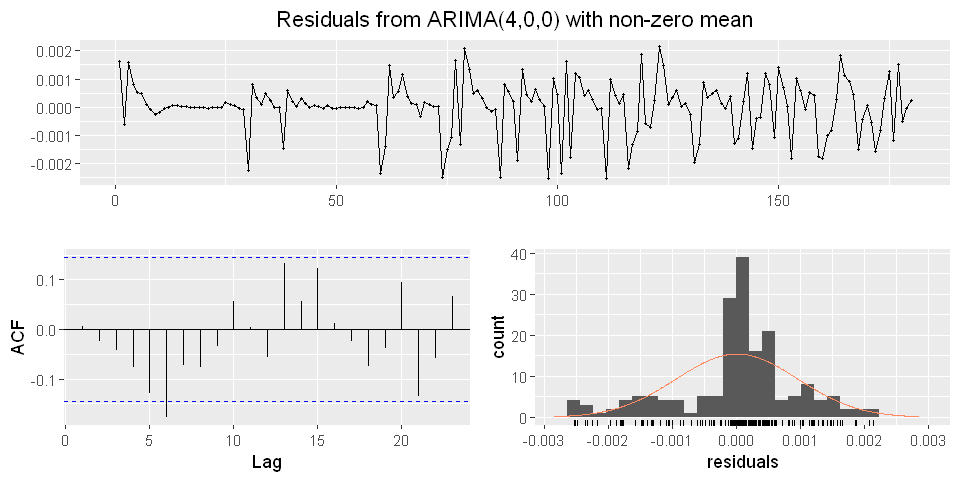

In [251]:
checkresiduals(ar_closes_wo_SSA)

In [252]:
summary(ar_closes_wo_SSA)


Call:
arima(x = X_wo_SSA, order = c(4, 0, 0))

Coefficients:
          ar1      ar2      ar3      ar4  intercept
      -0.5886  -0.4095  -0.3499  -0.1172      0e+00
s.e.   0.0747   0.0823   0.0823   0.0755      1e-04

sigma^2 estimated as 8.916e-07:  log likelihood = 998.02,  aic = -1984.04

Training set error measures:
                       ME         RMSE          MAE MPE MAPE      MASE
Training set 7.790539e-06 0.0009442516 0.0006541247 NaN  Inf 0.5566634
                    ACF1
Training set 0.005155967


In [253]:
ar_closes_wo_SSA


Call:
arima(x = X_wo_SSA, order = c(4, 0, 0))

Coefficients:
          ar1      ar2      ar3      ar4  intercept
      -0.5886  -0.4095  -0.3499  -0.1172      0e+00
s.e.   0.0747   0.0823   0.0823   0.0755      1e-04

sigma^2 estimated as 8.916e-07:  log likelihood = 998.02,  aic = -1984.04

In [254]:
forecast::forecast(ar_closes_wo_SSA, h=3)

    Point Forecast        Lo 80       Hi 80        Lo 95       Hi 95
181  -2.318322e-05 -0.001233290 0.001186924 -0.001873882 0.001827516
182  -4.036804e-05 -0.001444522 0.001363786 -0.002187837 0.002107101
183  -4.286423e-05 -0.001449095 0.001363366 -0.002193508 0.002107779

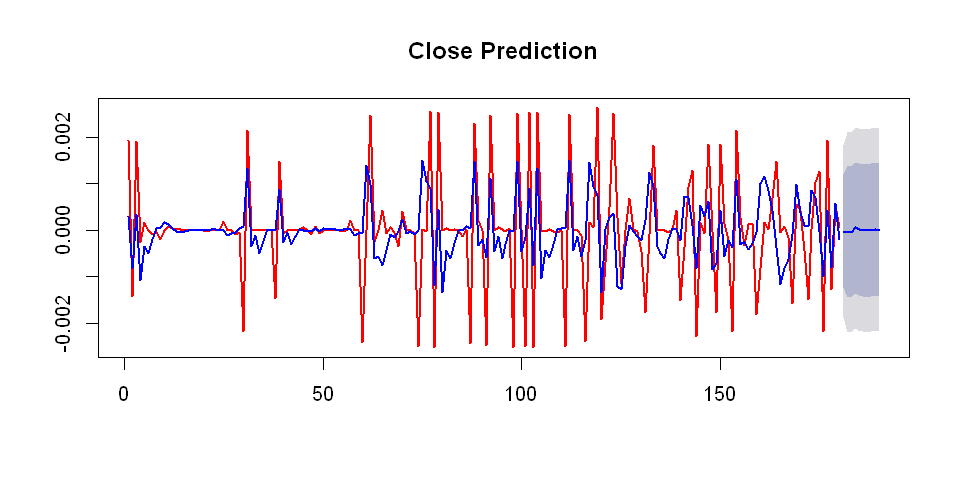

In [255]:
plot(forecast::forecast(ar_closes_wo_SSA), main='Close Prediction', lwd = 2, type="l", col="red")
lines(fitted(ar_closes_wo_SSA),col="blue", lwd = 2)
# Добавляем цены закрытия (красные) и предсказания цен закрытия (синие)

In [256]:
print('Close Price Predictions')
pred_closes_wo_SSA <- predict(ar_closes_wo_SSA, n.ahead = 3)

print(pred_closes_wo_SSA)

[1] "Close Price Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] -2.318322e-05 -4.036804e-05 -4.286423e-05

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.0009442516 0.0010956674 0.0010972874



In [257]:
MAE_closes_wo_SSA <- MAE(pred_closes_wo_SSA$pred, y_test)
MSE_closes_wo_SSA <- MSE(pred_closes_wo_SSA$pred, y_test)
MAPE_closes_wo_SSA <- MAPE(pred_closes_wo_SSA$pred, y_test)

***

In [258]:
print("Best ARIMA Model for Close Prices with SSA")
print(arimaorder(auto.arima(X_SSA, approximation=FALSE)))

[1] "Best ARIMA Model for Close Prices with SSA"
p d q 
2 0 2 


In [259]:
q = as.integer(arimaorder(auto.arima(X_SSA, approximation=FALSE))[3])

In [260]:
ar_closes_with_SSA <- Arima(X_SSA, order=c(1, 0, q))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 254.26, df = 6, p-value < 2.2e-16

Model df: 4.   Total lags used: 10



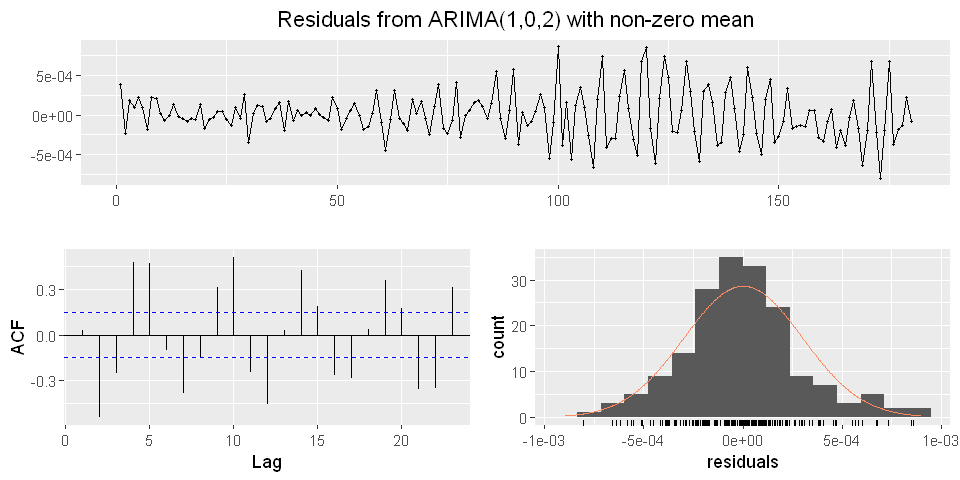

In [261]:
checkresiduals(ar_closes_with_SSA)

In [262]:
summary(ar_closes_with_SSA)

Series: X_SSA 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1     ma2   mean
      0.0606  -1.8734  1.0000  0e+00
s.e.  0.0769   0.0244  0.0209  1e-04

sigma^2 estimated as 9.05e-08:  log likelihood=1200.78
AIC=-2391.56   AICc=-2391.21   BIC=-2375.59

Training set error measures:
                       ME         RMSE          MAE      MPE     MAPE      MASE
Training set 1.577504e-06 0.0002974734 0.0002253177 84.86851 192.3324 0.3096862
                  ACF1
Training set 0.0296317


In [263]:
ar_closes_with_SSA

Series: X_SSA 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1     ma2   mean
      0.0606  -1.8734  1.0000  0e+00
s.e.  0.0769   0.0244  0.0209  1e-04

sigma^2 estimated as 9.05e-08:  log likelihood=1200.78
AIC=-2391.56   AICc=-2391.21   BIC=-2375.59

In [264]:
forecast::forecast(ar_closes_with_SSA, h=3)

    Point Forecast         Lo 80        Hi 80         Lo 95        Hi 95
181   3.299781e-04 -5.768896e-05 0.0007176452 -0.0002629075 0.0009228637
182  -6.531130e-05 -8.644179e-04 0.0007337953 -0.0012874394 0.0011568168
183  -6.950756e-06 -8.757994e-04 0.0008618979 -0.0013357401 0.0013218386

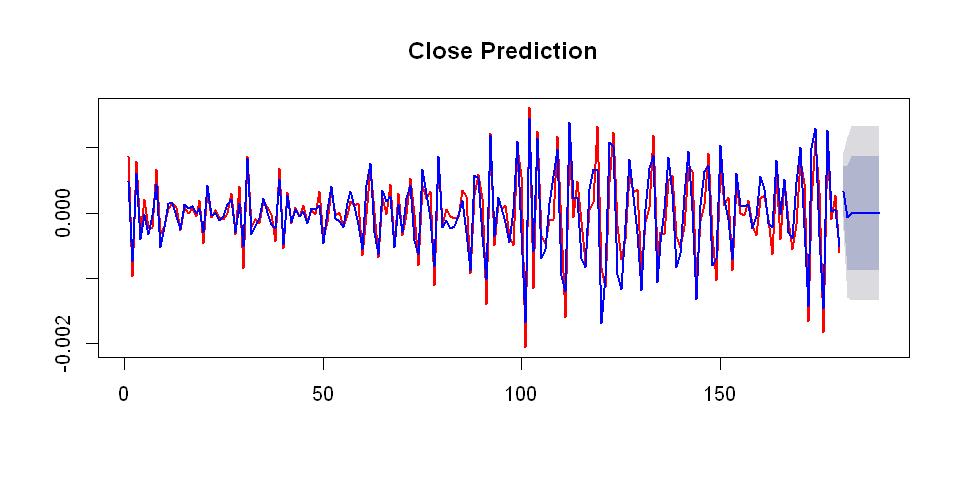

In [265]:
plot(forecast::forecast(ar_closes_with_SSA), main='Close Prediction', lwd = 2, type="l", col="red")
lines(fitted(ar_closes_with_SSA),col="blue", lwd = 2)
# Добавляем цены закрытия (красные) и предсказания цен закрытия (синие)

In [266]:
print('Close Price Predictions')
pred_closes_with_SSA <- predict(ar_closes_with_SSA, n.ahead = 3)

print(pred_closes_with_SSA)

[1] "Close Price Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1]  3.299781e-04 -6.531130e-05 -6.950756e-06

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.0003024982 0.0006235462 0.0006779662



In [267]:
MAE_closes_with_SSA <- MAE(pred_closes_with_SSA$pred, y_test)
MSE_closes_with_SSA <- MSE(pred_closes_with_SSA$pred, y_test)
MAPE_closes_with_SSA <- MAPE(pred_closes_with_SSA$pred, y_test)

In [268]:
results <- data.frame(
    metrics = c('MSE', 'MAE', 'MAPE'),
    wo_SSA = c(MSE_closes_wo_SSA, MAE_closes_wo_SSA, MAPE_closes_wo_SSA),
    with_SSA = c(MSE_closes_with_SSA, MAE_closes_with_SSA, MAPE_closes_with_SSA)
)
results

metrics,wo_SSA,with_SSA
MSE,2.056375e-06,1.816711e-06
MAE,1.127453e-03,9.894472e-04
MAPE,1.274152e+00,9.252219e-01


__Итог: модель ARIMA, обученная на очищенных данных, опять же имеет показатели значительно лучше, чем ARIMA, обученная на исходных данных.__

# SSA - несколько предсказаний

In [282]:
data_test = data$Price

In [343]:
MAE_closes_wo_SSA = c()
MSE_closes_wo_SSA = c()
MAPE_closes_wo_SSA = c()
MAE_closes_with_SSA = c()
MSE_closes_with_SSA = c()
MAPE_closes_with_SSA = c()

In [344]:
for (i in 1:13) {
    X = data_test[i:(180+i-1)]
    y = data_test[(180+i):(182+i)]
    s <- ssa(X, L = 30)
    corr <- melt(wcor(s)[-(nrow(wcor(s)) + 1), ])
    groups = group_by_max_corr(corr)
    recon <- reconstruct(s, groups = groups)
    to_exclude = test_lillie(recon)
    recon <- reconstruct(s, groups = list(unlist(groups[-to_exclude])))
    res <- residuals(recon)
    X_SSA = recon$F1
    ar_closes_wo_SSA <- auto.arima(X, approximation=FALSE)
    pred_closes_wo_SSA <- predict(ar_closes_wo_SSA, n.ahead = 3)
    MAE_closes_wo_SSA <- c(MAE_closes_wo_SSA, MAE(pred_closes_wo_SSA$pred, y))
    MSE_closes_wo_SSA <- c(MSE_closes_wo_SSA, MSE(pred_closes_wo_SSA$pred, y))
    MAPE_closes_wo_SSA <- c(MAPE_closes_wo_SSA, MAPE(pred_closes_wo_SSA$pred, y))
    ar_closes_with_SSA <- auto.arima(X_SSA, approximation=FALSE)
    pred_closes_with_SSA <- predict(ar_closes_with_SSA, n.ahead = 3)
    MAE_closes_with_SSA <- c(MAE_closes_with_SSA, MAE(pred_closes_with_SSA$pred, y))
    MSE_closes_with_SSA <- c(MSE_closes_with_SSA, MSE(pred_closes_with_SSA$pred, y))
    MAPE_closes_with_SSA <- c(MAPE_closes_with_SSA, MAPE(pred_closes_with_SSA$pred, y))
}

In [345]:
results <- data.frame(
    metrics = c('MSE', 'MAE', 'MAPE'),
    wo_SSA = c(mean(MSE_closes_wo_SSA), mean(MAE_closes_wo_SSA), mean(MAPE_closes_wo_SSA)),
    with_SSA = c(mean(MSE_closes_with_SSA), mean(MAE_closes_with_SSA), mean(MAPE_closes_with_SSA))
)
results

metrics,wo_SSA,with_SSA
MSE,0.01015943,0.008584878
MAE,0.09331334,0.079631818
MAPE,0.00122341,0.001043714


In [351]:
data_test = data$Returns

In [378]:
MAE_closes_wo_SSA = c()
MSE_closes_wo_SSA = c()
MAPE_closes_wo_SSA = c()
MAE_closes_with_SSA = c()
MSE_closes_with_SSA = c()
MAPE_closes_with_SSA = c()

In [379]:
for (i in 2:12) {
    X = data_test[i:(180+i-1)]
    y = data_test[(180+i):(182+i)]
    s <- ssa(X, L = 30)
    corr <- melt(wcor(s)[-(nrow(wcor(s)) + 1), ])
    groups = group_by_max_corr(corr)
    recon <- reconstruct(s, groups = groups)
    to_exclude = test_lillie(recon)
    recon <- reconstruct(s, groups = list(unlist(groups[-to_exclude])))
    res <- residuals(recon)
    X_SSA = recon$F1
    ar_closes_wo_SSA <- auto.arima(X, approximation=FALSE)
    pred_closes_wo_SSA <- predict(ar_closes_wo_SSA, n.ahead = 3)
    MAE_closes_wo_SSA <- c(MAE_closes_wo_SSA, MAE(pred_closes_wo_SSA$pred, y))
    MSE_closes_wo_SSA <- c(MSE_closes_wo_SSA, MSE(pred_closes_wo_SSA$pred, y))
    MAPE_closes_wo_SSA <- c(MAPE_closes_wo_SSA, MAPE(pred_closes_wo_SSA$pred, y))
    ar_closes_with_SSA <- auto.arima(X_SSA, approximation=TRUE)
    pred_closes_with_SSA <- predict(ar_closes_with_SSA, n.ahead = 3)
    MAE_closes_with_SSA <- c(MAE_closes_with_SSA, MAE(pred_closes_with_SSA$pred, y))
    MSE_closes_with_SSA <- c(MSE_closes_with_SSA, MSE(pred_closes_with_SSA$pred, y))
    MAPE_closes_with_SSA <- c(MAPE_closes_with_SSA, MAPE(pred_closes_with_SSA$pred, y))
}

In [380]:
results <- data.frame(
    metrics = c('MSE', 'MAE', 'MAPE'),
    wo_SSA = c(mean(MSE_closes_wo_SSA), mean(MAE_closes_wo_SSA), mean(MAPE_closes_wo_SSA)),
    with_SSA = c(mean(MSE_closes_with_SSA), mean(MAE_closes_with_SSA), mean(MAPE_closes_with_SSA))
)
results

metrics,wo_SSA,with_SSA
MSE,1.220863e-06,1.315820e-06
MAE,8.373032e-04,9.401320e-04
MAPE,5.377911e+00,5.115731e+00
